<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Уменьшение-шума" data-toc-modified-id="Уменьшение-шума-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Уменьшение шума</a></span></li><li><span><a href="#VAE" data-toc-modified-id="VAE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>VAE</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
torch.cuda.is_available()

True

In [3]:
# hyperparams
inp_dim = 32 * 32 * 3
#try to use other model params. check overfitting with large models
hidden = 350
out_dim = 60
device = 'cuda' if torch.cuda.is_available() else 'cpu'
n_epochs = 10
batch_size = 128

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     #transforms.Normalize((0.5), (0.5)),
     ])


dataset_train = datasets.CIFAR10('.',
                               train=True,            
                               download=True, 
                               transform=transform)
trainloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

dataset_test = datasets.CIFAR10('.',
                              train=False,
                              download=True,
                              transform=transform)
testloader = torch.utils.data.DataLoader(dataset_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          num_workers=2, 
                                          drop_last = True,)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
dataset_test[555]

(tensor([[[0.5255, 0.5255, 0.5333,  ..., 0.6196, 0.6196, 0.6000],
          [0.5176, 0.4941, 0.5020,  ..., 0.6706, 0.6902, 0.6745],
          [0.5098, 0.4784, 0.4824,  ..., 0.7569, 0.7059, 0.6784],
          ...,
          [0.3216, 0.2824, 0.2902,  ..., 0.3647, 0.3843, 0.4078],
          [0.3098, 0.2902, 0.2863,  ..., 0.3882, 0.4078, 0.3961],
          [0.4706, 0.4353, 0.4275,  ..., 0.3725, 0.3882, 0.4078]],
 
         [[0.5882, 0.6118, 0.6235,  ..., 0.7020, 0.7137, 0.6863],
          [0.6078, 0.6078, 0.6196,  ..., 0.8196, 0.8510, 0.8353],
          [0.6235, 0.6118, 0.6235,  ..., 0.9098, 0.8824, 0.8549],
          ...,
          [0.3333, 0.3059, 0.3176,  ..., 0.4235, 0.4314, 0.4471],
          [0.3098, 0.3020, 0.3059,  ..., 0.4431, 0.4431, 0.4157],
          [0.4627, 0.4353, 0.4275,  ..., 0.4039, 0.4078, 0.4118]],
 
         [[0.5843, 0.6235, 0.6314,  ..., 0.7176, 0.7216, 0.6745],
          [0.5804, 0.5882, 0.5961,  ..., 0.8039, 0.8353, 0.8000],
          [0.5765, 0.5725, 0.5725,  ...,

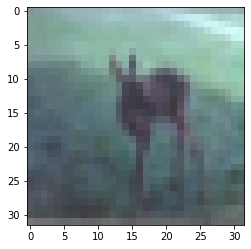

In [5]:
plt.imshow(transforms.ToPILImage()(dataset_test[555][0]));

In [ ]:
class Encoder(nn.Module):
  #32*32 -> hidden -> hidden_out
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    #TODO try to use other layers
    self.linear1 = nn.Linear(input_dim, hidden_dim)
    self.do = nn.Dropout(0.1)
    self.activ = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, out_dim)

  def forward(self, x):
    x = self.linear1(x)
    x = self.activ(x)
    x = self.do(x)
    x = self.linear2(x)

    return x

class Decoder(nn.Module):
  #hidden_out-> hidden -> 32*32
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    #TODO try to use other layers
    self.linear1 = nn.Linear(out_dim, hidden_dim)
    self.do = nn.Dropout(0.1)
    self.activ = nn.ReLU()
    self.linear2 = nn.Linear(hidden_dim, input_dim)

  def forward(self, x):
    x = self.linear1(x)
    x = self.activ(x)
    x = self.do(x)
    x = self.linear2(x)

    return x

class LinearAutoEncoder(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super().__init__()
    self.encoder = Encoder(input_dim, hidden_dim, out_dim)
    self.decoder = Decoder(input_dim, hidden_dim, out_dim)

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [ ]:
model = LinearAutoEncoder(inp_dim, hidden, out_dim).to(device)
optim = torch.optim.Adam(model.parameters())
#loss_func = nn.MSELoss() #TODO try to use MAE
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.47551488876342773
epoch: 0, step: 200, loss: 0.12660562992095947


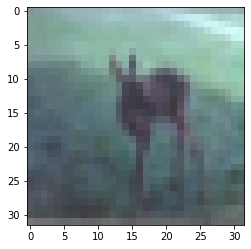

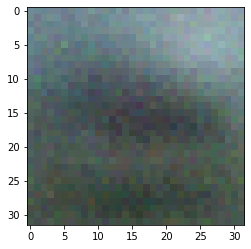

epoch: 1, step: 0, loss: 0.12244915962219238
epoch: 1, step: 200, loss: 0.10862116515636444


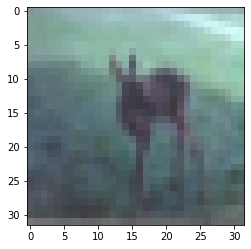

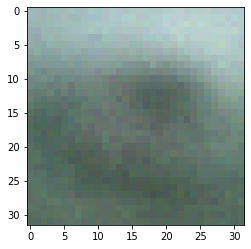

epoch: 2, step: 0, loss: 0.10758446156978607
epoch: 2, step: 200, loss: 0.10613846033811569


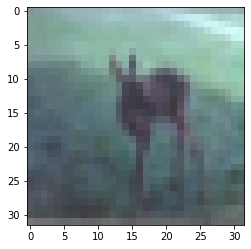

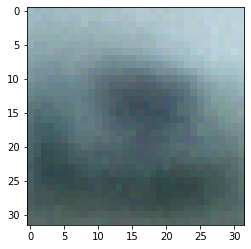

epoch: 3, step: 0, loss: 0.10134868323802948
epoch: 3, step: 200, loss: 0.10531886667013168


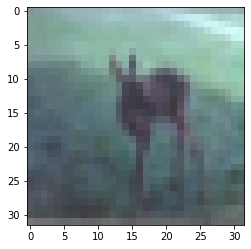

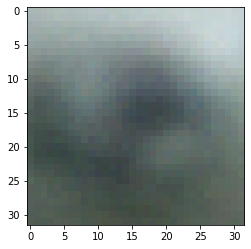

epoch: 4, step: 0, loss: 0.0965673178434372
epoch: 4, step: 200, loss: 0.10404520481824875


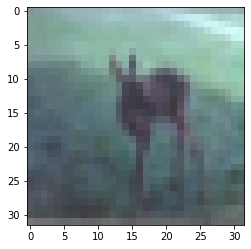

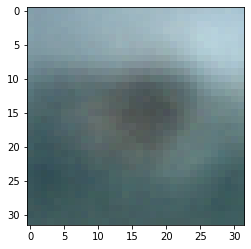

epoch: 5, step: 0, loss: 0.10079195350408554
epoch: 5, step: 200, loss: 0.09735365957021713


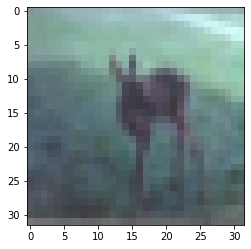

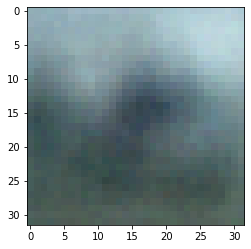

epoch: 6, step: 0, loss: 0.10197830200195312
epoch: 6, step: 200, loss: 0.10253380984067917


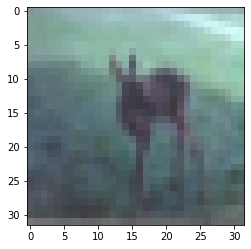

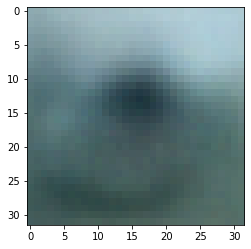

epoch: 7, step: 0, loss: 0.09519504755735397
epoch: 7, step: 200, loss: 0.0973140224814415


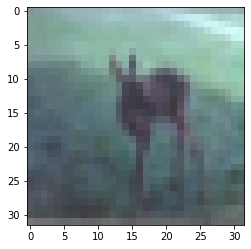

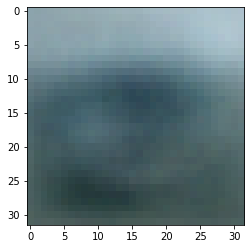

epoch: 8, step: 0, loss: 0.09665348380804062
epoch: 8, step: 200, loss: 0.1012006625533104


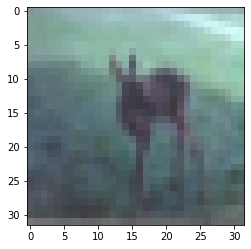

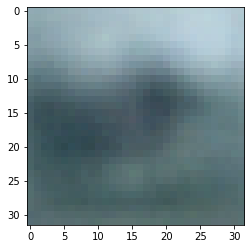

epoch: 9, step: 0, loss: 0.09921537339687347
epoch: 9, step: 200, loss: 0.09317643940448761


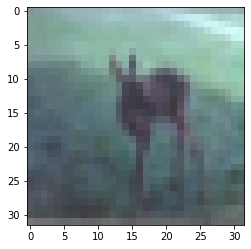

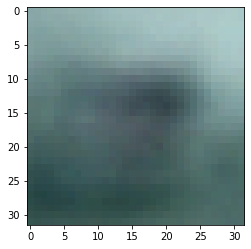

In [ ]:
# hidden_out = 40
for epoch in range(n_epochs):
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model(inputs.view(inputs.size(0), -1).to(device))
        loss = loss_func(inputs.view(inputs.size(0), -1).to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    #item = dataset_test.data[555].unsqueeze(0).view(1, -1).to(device).float()
    #plt.imshow(dataset_test.data[555].detach().numpy())
    item = dataset_test[555][0].to(device).float().reshape(1, -1).to(device).float()
    plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))

    plt.show()
    plt.imshow(transforms.ToPILImage()(model(item).view((3, 32, 32)).cpu().detach()))
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')


In [6]:
input_channels = 3
hidden_channels = 300

In [7]:
class ConvEncoder(nn.Module):
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) 
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.pool1 = nn.MaxPool2d(2, 2) # 16x16
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool2 = nn.MaxPool2d(2, 2) # 8x8
    self.conv3 = nn.ConvTranspose2d(hidden_ch*3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.activ3 = nn.ReLU()
    self.norm = nn.BatchNorm2d(hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    

  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.activ3(x)
    x = self.norm(x)
    x = self.do3(x)
    x = self.conv4(x)

    return x

class ConvDecoder(nn.Module):

  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingNearest2d(scale_factor=2) # 16x16
    self.conv2 = nn.ConvTranspose2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 32x32
    self.conv3 = nn.Conv2d(hidden_ch*3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ3 = nn.ReLU()
    self.norm = nn.BatchNorm2d(hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2) # 32x32



  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.upsample1(x)
    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool(x)
    x = self.upsample2(x)
    x = self.conv3(x)
    x = self.activ3(x)
    x = self.norm(x)
    x = self.do3(x)
    x = self.conv4(x)

    return x

class ConvAutoEncoder(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvEncoder(input_ch, hidden_ch, )
    self.decoder = ConvDecoder(input_ch, hidden_ch, )

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [8]:
model = ConvAutoEncoder(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model.parameters())
loss_func = nn.MSELoss() #TODO try to use MAE
#loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.6726080179214478
epoch: 0, step: 200, loss: 0.025745004415512085


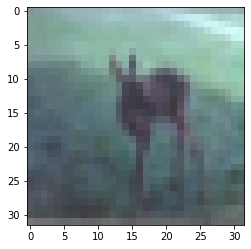

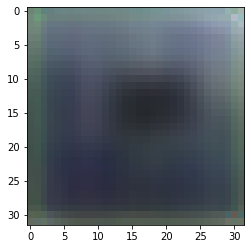

epoch: 1, step: 0, loss: 0.017943251878023148
epoch: 1, step: 200, loss: 0.014113995246589184


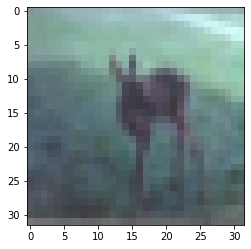

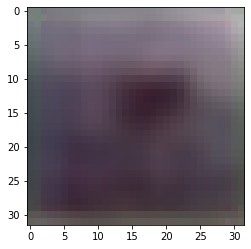

epoch: 2, step: 0, loss: 0.0109517527744174
epoch: 2, step: 200, loss: 0.009354432113468647


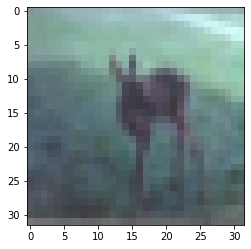

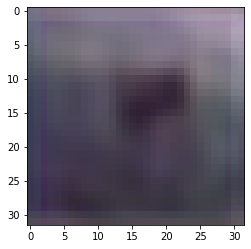

epoch: 3, step: 0, loss: 0.008252688683569431
epoch: 3, step: 200, loss: 0.007038983516395092


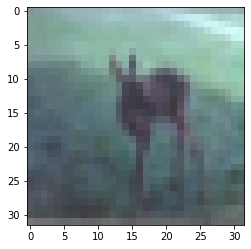

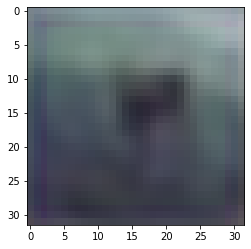

epoch: 4, step: 0, loss: 0.006725712679326534
epoch: 4, step: 200, loss: 0.00695924973115325


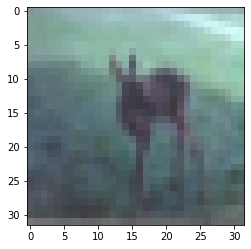

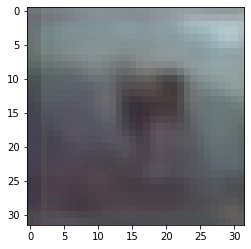

epoch: 5, step: 0, loss: 0.005991095677018166
epoch: 5, step: 200, loss: 0.006553979124873877


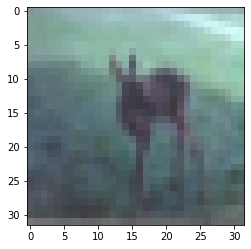

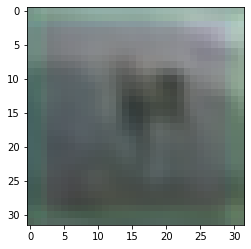

epoch: 6, step: 0, loss: 0.006319066043943167
epoch: 6, step: 200, loss: 0.006138872355222702


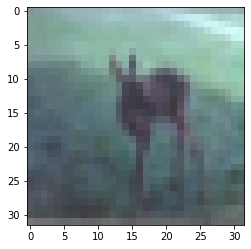

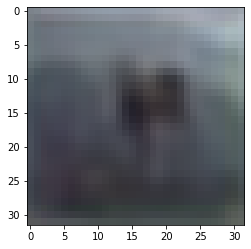

epoch: 7, step: 0, loss: 0.006333380006253719
epoch: 7, step: 200, loss: 0.02252224087715149


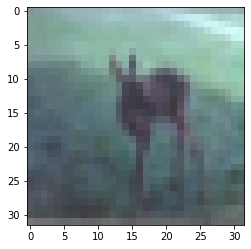

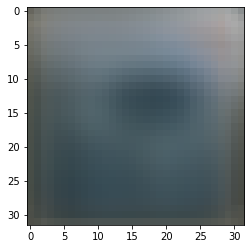

epoch: 8, step: 0, loss: 0.01575670950114727
epoch: 8, step: 200, loss: 0.01231658086180687


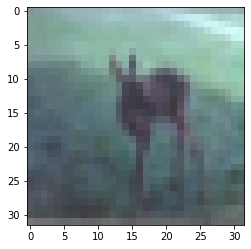

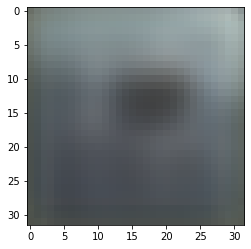

epoch: 9, step: 0, loss: 0.01211734488606453
epoch: 9, step: 200, loss: 0.012094518169760704


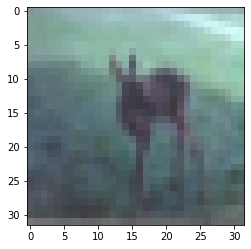

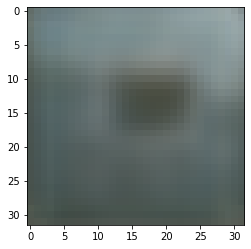

In [9]:
for epoch in range(n_epochs):
    model.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    model.train(False)
    item = dataset_test[555][0].to(device).float()
    plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
    plt.show()
    plt.imshow(transforms.ToPILImage()(model(item.unsqueeze(0)).squeeze().cpu().detach()))
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

In [10]:
hidden_channels = 128

In [11]:
class ConvEncoder2(nn.Module):
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) 
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.pool1 = nn.MaxPool2d(2, 2) # 16x16
    self.norm = nn.BatchNorm2d(hidden_ch)
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool2 = nn.MaxPool2d(2, 2) # 8x8
    self.norm2 = nn.BatchNorm2d(hidden_ch*3)
    self.conv3 = nn.ConvTranspose2d(hidden_ch*3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.activ3 = nn.ReLU()
    self.norm3 = nn.BatchNorm2d(hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    

  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.pool1(x)
    #x = self.norm(x)
    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool2(x)
    #x = self.norm2(x)
    x = self.conv3(x)
    x = self.activ3(x)
    x = self.norm3(x)
    x = self.do3(x)
    x = self.conv4(x)

    return x

class ConvDecoder2(nn.Module):

  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingNearest2d(scale_factor=2) # 16x16
    self.norm = nn.BatchNorm2d(hidden_ch)
    self.conv2 = nn.ConvTranspose2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 32x32
    self.norm2 = nn.BatchNorm2d(hidden_ch*3)
    self.conv3 = nn.Conv2d(hidden_ch*3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ3 = nn.ReLU()
    self.norm3 = nn.BatchNorm2d(hidden_ch)
    self.do3 = nn.Dropout(0.1)
    self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2) # 32x32



  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.upsample1(x)
    #x = self.norm(x)
    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool(x)
    x = self.upsample2(x)
    #x = self.norm2(x)
    x = self.conv3(x)
    x = self.activ3(x)
    x = self.norm3(x)
    x = self.do3(x)
    x = self.conv4(x)

    return x

class ConvAutoEncoder2(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvEncoder2(input_ch, hidden_ch, )
    self.decoder = ConvDecoder2(input_ch, hidden_ch, )

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [12]:
model2 = ConvAutoEncoder2(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model2.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5957110524177551
epoch: 0, step: 200, loss: 0.09701593220233917


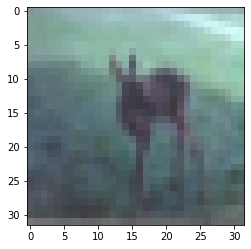

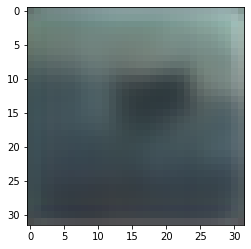

epoch: 1, step: 0, loss: 0.08018381893634796
epoch: 1, step: 200, loss: 0.07059013843536377


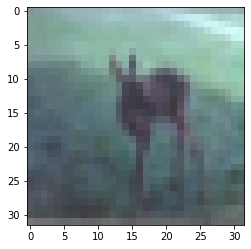

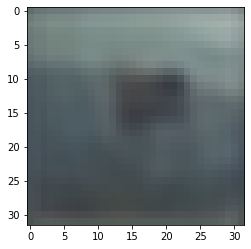

epoch: 2, step: 0, loss: 0.06606617569923401
epoch: 2, step: 200, loss: 0.05990862846374512


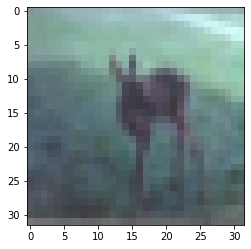

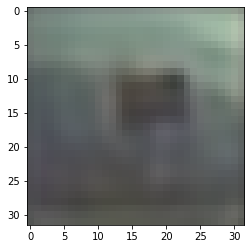

epoch: 3, step: 0, loss: 0.06338287889957428
epoch: 3, step: 200, loss: 0.05574747174978256


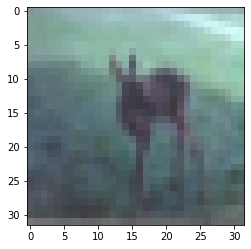

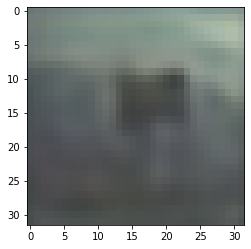

epoch: 4, step: 0, loss: 0.052933793514966965
epoch: 4, step: 200, loss: 0.0574754923582077


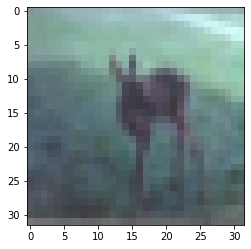

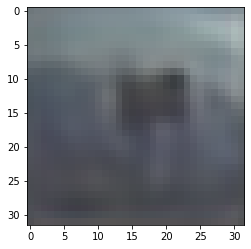

epoch: 5, step: 0, loss: 0.05909346044063568
epoch: 5, step: 200, loss: 0.059705328196287155


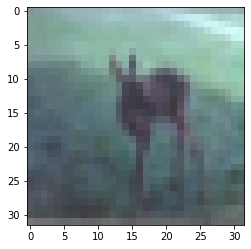

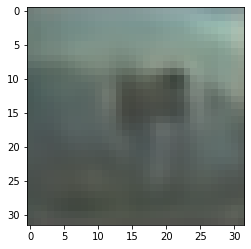

epoch: 6, step: 0, loss: 0.054395269602537155
epoch: 6, step: 200, loss: 0.05788994953036308


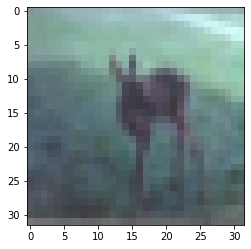

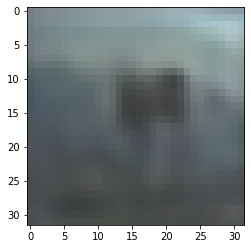

epoch: 7, step: 0, loss: 0.05394844338297844
epoch: 7, step: 200, loss: 0.04772825166583061


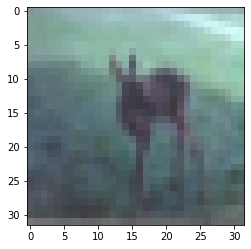

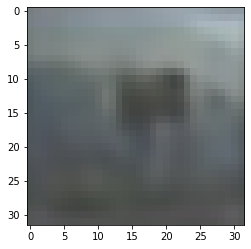

epoch: 8, step: 0, loss: 0.052919935435056686
epoch: 8, step: 200, loss: 0.05138569325208664


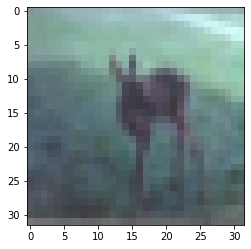

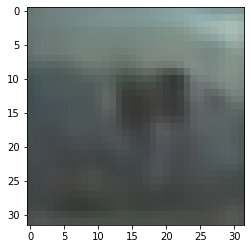

epoch: 9, step: 0, loss: 0.050422631204128265
epoch: 9, step: 200, loss: 0.05165658891201019


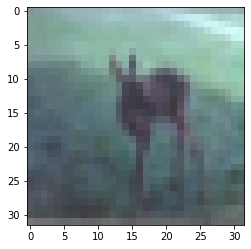

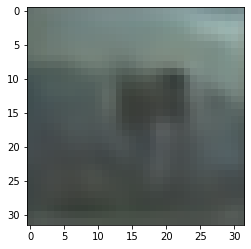

In [13]:
for epoch in range(n_epochs):
    model2.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model2(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    model2.train(False)
    item = dataset_test[555][0].to(device).float()
    plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
    plt.show()
    plt.imshow(transforms.ToPILImage()(model2(item.unsqueeze(0)).squeeze().cpu().detach()))
    plt.show()
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')

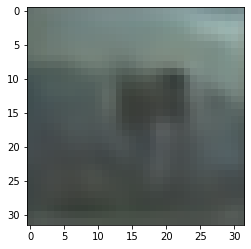

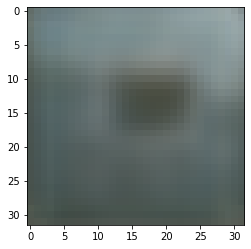

In [14]:
plt.imshow(transforms.ToPILImage()(model2(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()
plt.imshow(transforms.ToPILImage()(model(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()

In [15]:
class ConvEncoder3(nn.Module):
  def __init__(self, input_ch, hidden_ch):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(input_ch, hidden_ch, kernel_size=5, stride=1, 
                           padding=2) 
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.pool1 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5)) # 16x16
    
    self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.pool2 = nn.MaxPool2d(2, 2) # 8x8


    self.conv3 = nn.ConvTranspose2d(hidden_ch*3, hidden_ch*2, kernel_size=3, stride=1, 
                           padding=1)
    self.activ3 = nn.ReLU()
    self.do3 = nn.Dropout(0.1)

    self.conv4 = nn.ConvTranspose2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.activ4 = nn.ReLU()
    self.norm = nn.BatchNorm2d(hidden_ch)
    
    self.conv5 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    

  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.pool2(x)

    x = self.conv3(x)
    x = self.activ3(x)
    x = self.do3(x)

    x = self.conv4(x)
    x = self.activ4(x)
    x = self.norm(x)

    x = self.conv5(x)

    return x

class ConvDecoder3(nn.Module):

  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    #TODO try to use other layers
    self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1, 
                           padding=1) # 8x8
    self.activ = nn.ReLU()
    self.do1 = nn.Dropout(0.1)
    self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2) # 16x16
    
    self.conv2 = nn.ConvTranspose2d(hidden_ch, hidden_ch*3, kernel_size=3, stride=1, 
                           padding=1) # 16x16
    self.activ2 = nn.ReLU()
    self.do2 = nn.Dropout(0.1)
    self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2) # 32x32

    self.conv3 = nn.Conv2d(hidden_ch*3, hidden_ch*2, kernel_size=3, stride=1, 
                           padding=1)
    self.activ3 = nn.ReLU()
    self.do3 = nn.Dropout(0.1)

    self.conv4 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1, 
                           padding=1)
    self.activ4 = nn.ReLU()
    self.do4 = nn.Dropout(0.1)


    self.norm = nn.BatchNorm2d(hidden_ch)
    self.conv5 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1, 
                           padding=2) # 32x32



  def forward(self, x):
    x = self.conv1(x)
    x = self.activ(x)
    x = self.do1(x)
    x = self.upsample1(x)

    x = self.conv2(x)
    x = self.activ2(x)
    x = self.do2(x)
    x = self.upsample2(x)

    x = self.conv3(x)
    x = self.activ3(x)
    x = self.do3(x)

    x = self.conv4(x)
    x = self.activ4(x)
    x = self.do4(x)
    x = self.norm(x)

    x = self.conv5(x)

    return x

class ConvAutoEncoder3(nn.Module):
  def __init__(self, input_ch, hidden_ch, ):
    super().__init__()
    self.encoder = ConvEncoder3(input_ch, hidden_ch, )
    self.decoder = ConvDecoder3(input_ch, hidden_ch, )

  def forward(self, x):
    hidden = self.encoder(x)
    x_ = self.decoder(hidden)

    return x_


In [16]:
out_dim = 128
n_epochs = 20

In [17]:
model3 = ConvAutoEncoder3(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model3.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5553135871887207
epoch: 0, step: 200, loss: 0.10388056933879852


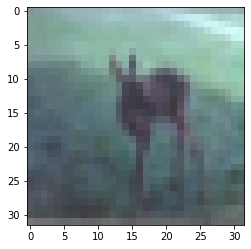

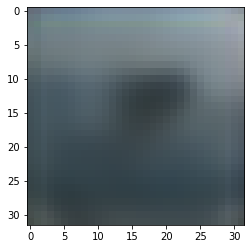

epoch: 1, step: 0, loss: 0.07179557532072067
epoch: 1, step: 200, loss: 0.07419981807470322


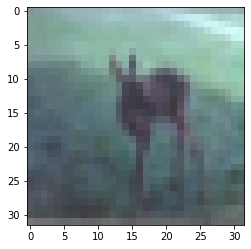

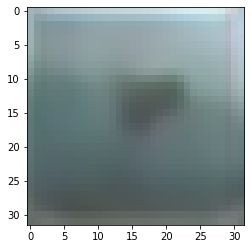

epoch: 2, step: 0, loss: 0.06980886310338974
epoch: 2, step: 200, loss: 0.062262631952762604


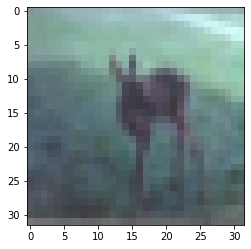

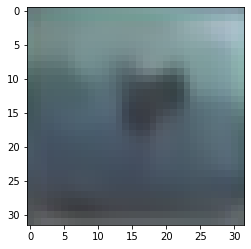

epoch: 3, step: 0, loss: 0.0598268136382103
epoch: 3, step: 200, loss: 0.06041790544986725


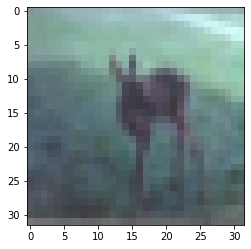

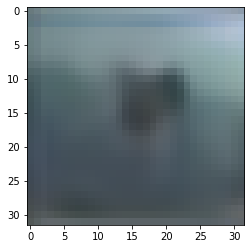

epoch: 4, step: 0, loss: 0.06049147993326187
epoch: 4, step: 200, loss: 0.054544009268283844


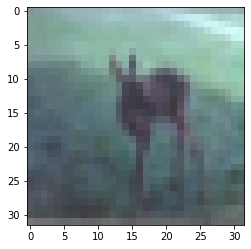

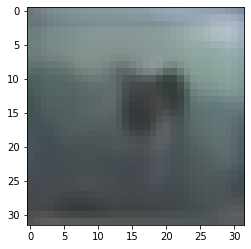

epoch: 5, step: 0, loss: 0.05394785851240158
epoch: 5, step: 200, loss: 0.05446893721818924


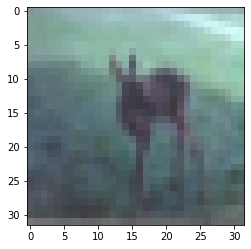

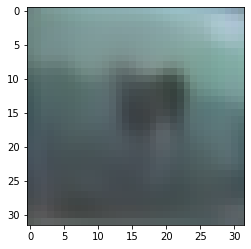

epoch: 6, step: 0, loss: 0.05207223445177078
epoch: 6, step: 200, loss: 0.05583734065294266


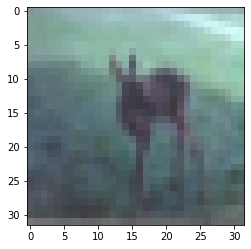

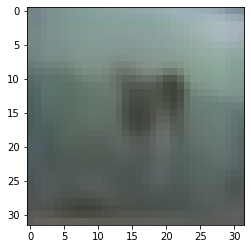

epoch: 7, step: 0, loss: 0.05440373346209526
epoch: 7, step: 200, loss: 0.053267769515514374


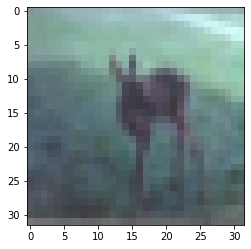

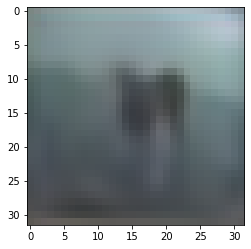

epoch: 8, step: 0, loss: 0.05352828651666641
epoch: 8, step: 200, loss: 0.054599665105342865


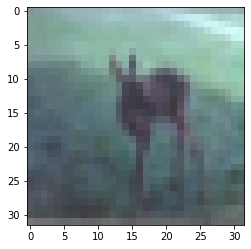

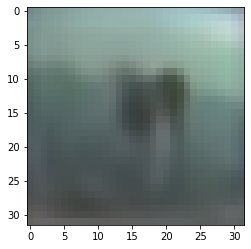

epoch: 9, step: 0, loss: 0.05467851087450981
epoch: 9, step: 200, loss: 0.0512760728597641


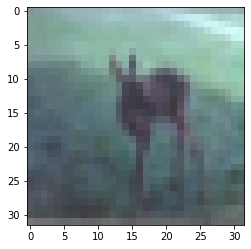

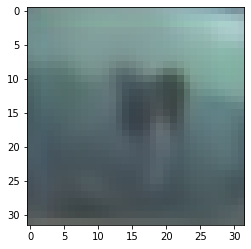

epoch: 10, step: 0, loss: 0.05373689532279968
epoch: 10, step: 200, loss: 0.0515173003077507


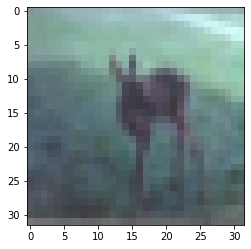

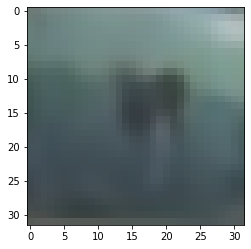

epoch: 11, step: 0, loss: 0.05462975427508354
epoch: 11, step: 200, loss: 0.054966919124126434


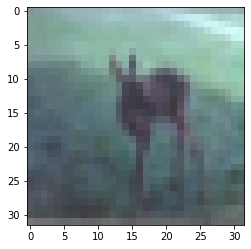

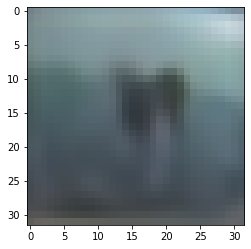

epoch: 12, step: 0, loss: 0.051897741854190826
epoch: 12, step: 200, loss: 0.05188179016113281


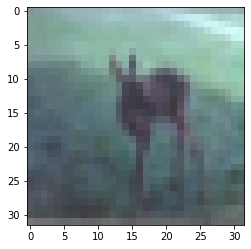

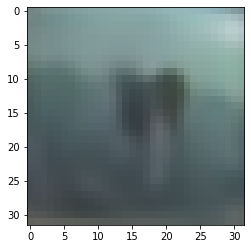

epoch: 13, step: 0, loss: 0.052983757108449936
epoch: 13, step: 200, loss: 0.05328145623207092


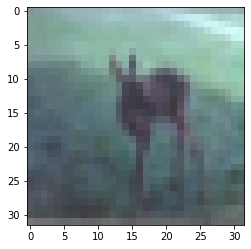

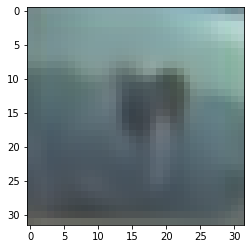

epoch: 14, step: 0, loss: 0.053947579115629196
epoch: 14, step: 200, loss: 0.04886399954557419


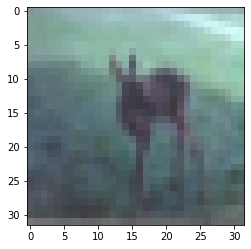

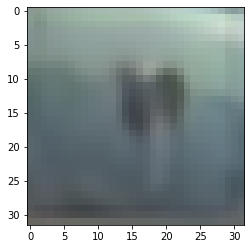

epoch: 15, step: 0, loss: 0.05343502759933472
epoch: 15, step: 200, loss: 0.05118232220411301


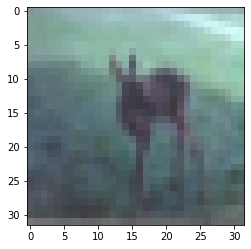

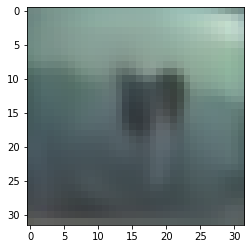

epoch: 16, step: 0, loss: 0.052406445145606995
epoch: 16, step: 200, loss: 0.051010869443416595


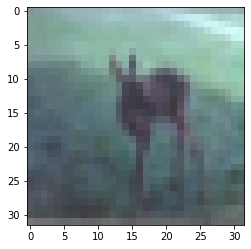

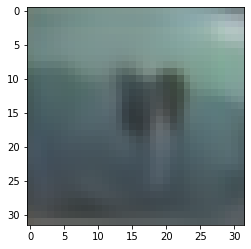

epoch: 17, step: 0, loss: 0.052563320845365524
epoch: 17, step: 200, loss: 0.05024009570479393


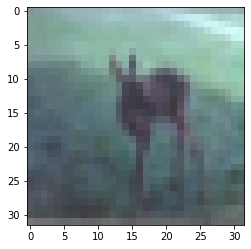

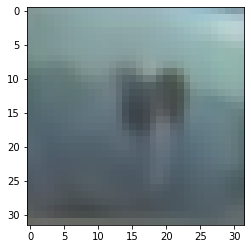

epoch: 18, step: 0, loss: 0.05170513316988945
epoch: 18, step: 200, loss: 0.05178049951791763


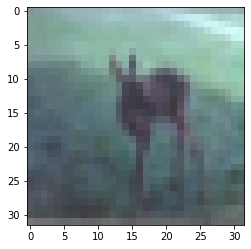

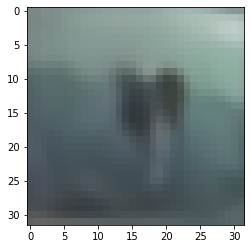

epoch: 19, step: 0, loss: 0.0488467738032341
epoch: 19, step: 200, loss: 0.04955440014600754


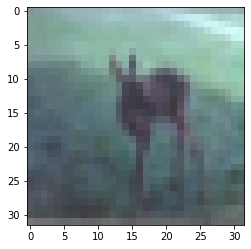

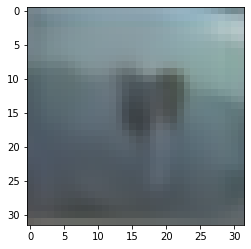

In [18]:
for epoch in range(n_epochs):
    model3.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model3(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    model3.train(False)
    item = dataset_test[555][0].to(device).float()
    plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
    plt.show()
    plt.imshow(transforms.ToPILImage()(model3(item.unsqueeze(0)).squeeze().cpu().detach()))
    plt.show()

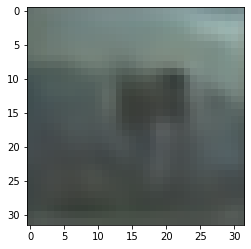

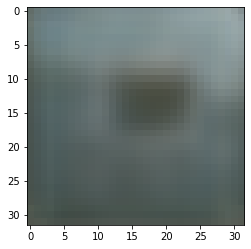

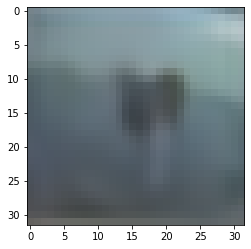

In [19]:
model2.train(False)
plt.imshow(transforms.ToPILImage()(model2(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()
model.train(False)
plt.imshow(transforms.ToPILImage()(model(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()
model3.train(False)
plt.imshow(transforms.ToPILImage()(model3(dataset_test[555][0].to(device).float().unsqueeze(0)).squeeze().cpu().detach()))
plt.show()

Разные варианты модели не дают приемлемого результата, но учатся уже достаточно продолжительное время. Было принято решение вместо усложнения архитектуры попробовать увеличение числа эпох.

In [20]:
class ConvEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                               padding=2)
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.pool1 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 8x8

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)

        self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1,
                               padding=1)  # 8x8

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.conv4(x)

        return x


class ConvDecoder4(nn.Module):

    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch*2, kernel_size=3, stride=1,
                               padding=1)  # 8x8
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x


class ConvAutoEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvEncoder4(input_ch, hidden_ch, )
        self.decoder = ConvDecoder4(input_ch, hidden_ch, )

    def forward(self, x):
        hidden = self.encoder(x)
        x_ = self.decoder(hidden)

        return x_


In [21]:
hidden_ch = 100
n_epochs = 30
model4 = ConvAutoEncoder4(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model4.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5101960897445679
epoch: 0, step: 200, loss: 0.08714567124843597


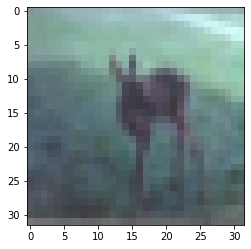

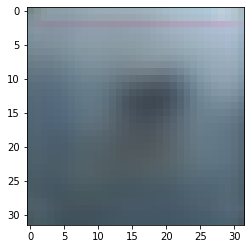

epoch: 1, step: 0, loss: 0.07852128148078918
epoch: 1, step: 200, loss: 0.07664363086223602


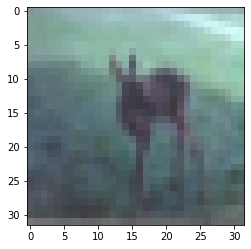

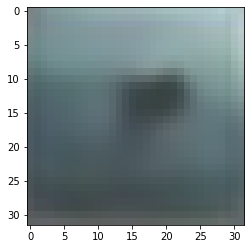

epoch: 2, step: 0, loss: 0.07093112170696259
epoch: 2, step: 200, loss: 0.06514774262905121


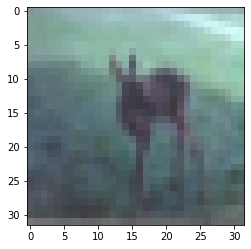

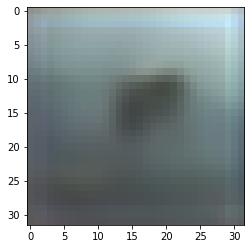

epoch: 3, step: 0, loss: 0.07148437201976776
epoch: 3, step: 200, loss: 0.06459414958953857


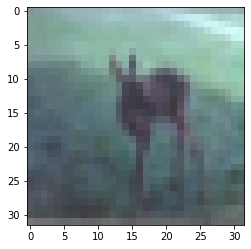

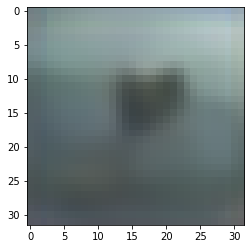

epoch: 4, step: 0, loss: 0.06173674389719963
epoch: 4, step: 200, loss: 0.06299085915088654


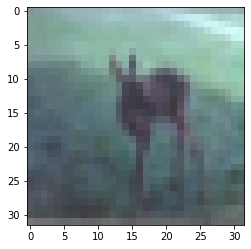

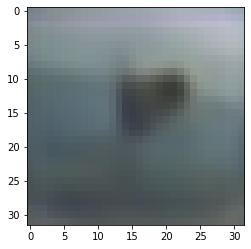

epoch: 5, step: 0, loss: 0.061851661652326584
epoch: 5, step: 200, loss: 0.06298726052045822


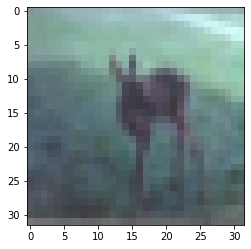

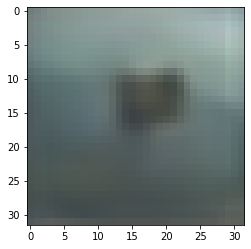

epoch: 6, step: 0, loss: 0.06401639431715012
epoch: 6, step: 200, loss: 0.060200851410627365


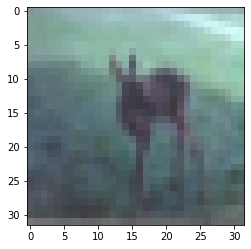

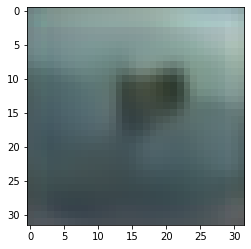

epoch: 7, step: 0, loss: 0.06302376091480255
epoch: 7, step: 200, loss: 0.06466120481491089


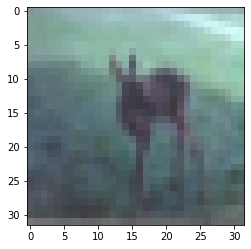

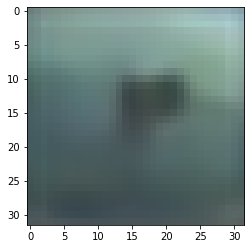

epoch: 8, step: 0, loss: 0.060819000005722046
epoch: 8, step: 200, loss: 0.06115381047129631


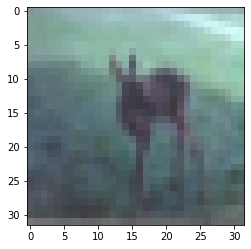

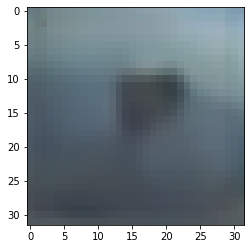

epoch: 9, step: 0, loss: 0.06016765162348747
epoch: 9, step: 200, loss: 0.061824943870306015


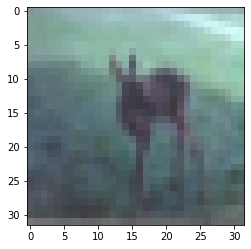

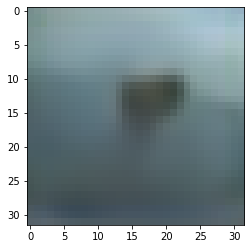

epoch: 10, step: 0, loss: 0.055957406759262085
epoch: 10, step: 200, loss: 0.057635560631752014


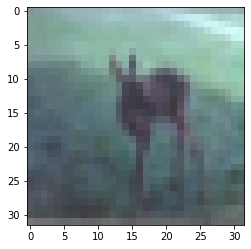

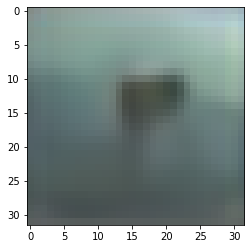

epoch: 11, step: 0, loss: 0.05901694297790527
epoch: 11, step: 200, loss: 0.06455561518669128


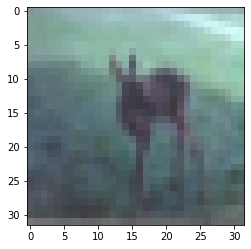

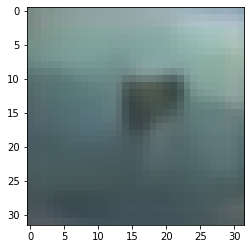

epoch: 12, step: 0, loss: 0.05816655606031418
epoch: 12, step: 200, loss: 0.0582711398601532


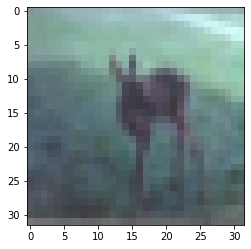

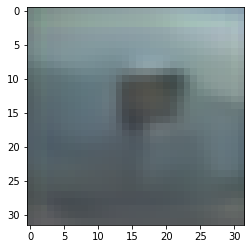

epoch: 13, step: 0, loss: 0.05801381915807724
epoch: 13, step: 200, loss: 0.059157274663448334


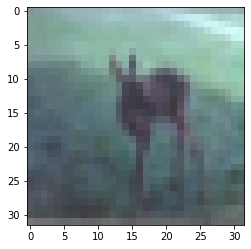

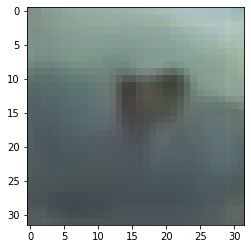

epoch: 14, step: 0, loss: 0.056986596435308456
epoch: 14, step: 200, loss: 0.05905434116721153


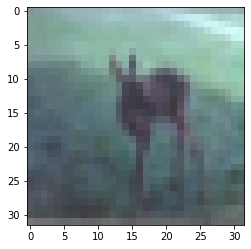

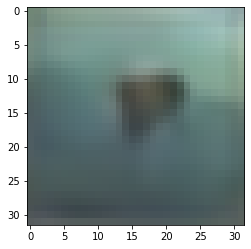

epoch: 15, step: 0, loss: 0.06246214359998703
epoch: 15, step: 200, loss: 0.06184902787208557


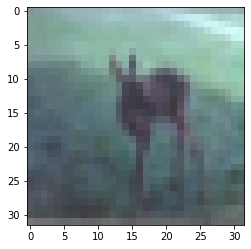

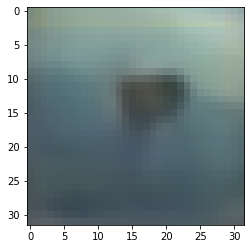

epoch: 16, step: 0, loss: 0.05775533244013786
epoch: 16, step: 200, loss: 0.05609307810664177


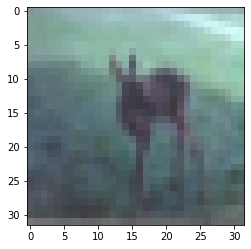

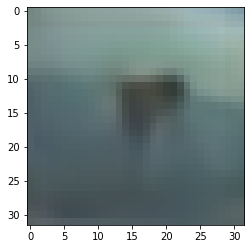

epoch: 17, step: 0, loss: 0.059304408729076385
epoch: 17, step: 200, loss: 0.05573488399386406


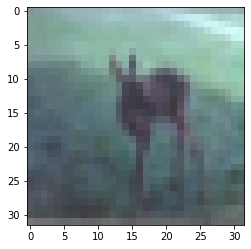

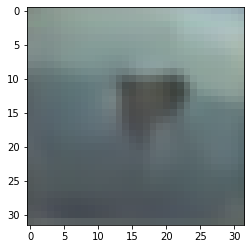

epoch: 18, step: 0, loss: 0.05824001878499985
epoch: 18, step: 200, loss: 0.05937844514846802


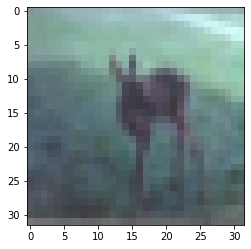

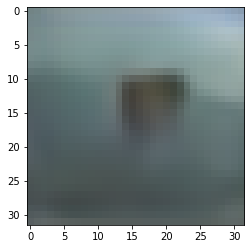

epoch: 19, step: 0, loss: 0.05803833529353142
epoch: 19, step: 200, loss: 0.06287683546543121


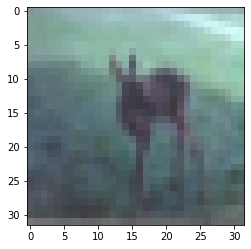

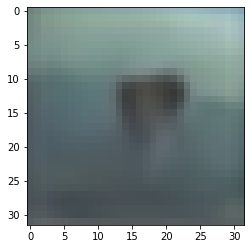

epoch: 20, step: 0, loss: 0.06028900668025017
epoch: 20, step: 200, loss: 0.058438774198293686


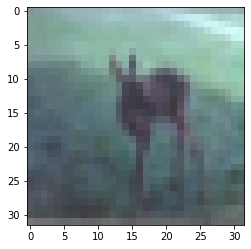

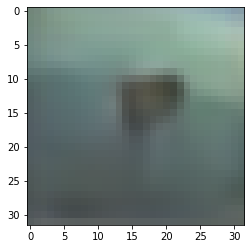

epoch: 21, step: 0, loss: 0.05825041979551315
epoch: 21, step: 200, loss: 0.05647648870944977


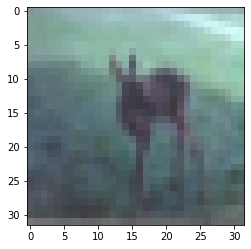

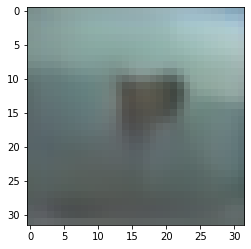

epoch: 22, step: 0, loss: 0.05930117517709732
epoch: 22, step: 200, loss: 0.05936641991138458


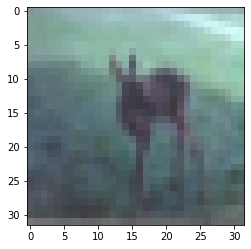

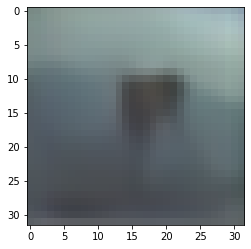

epoch: 23, step: 0, loss: 0.055496446788311005
epoch: 23, step: 200, loss: 0.05492136999964714


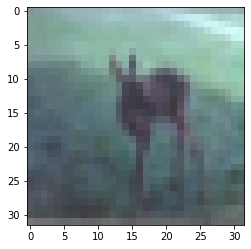

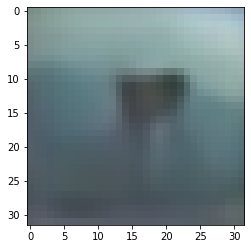

epoch: 24, step: 0, loss: 0.0553184449672699
epoch: 24, step: 200, loss: 0.05740051716566086


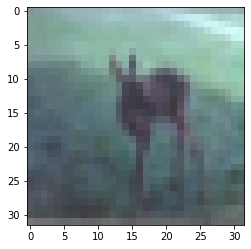

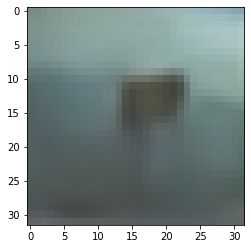

epoch: 25, step: 0, loss: 0.054893940687179565
epoch: 25, step: 200, loss: 0.057718675583601


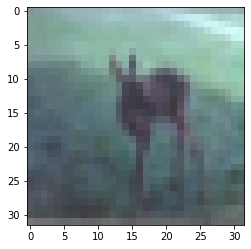

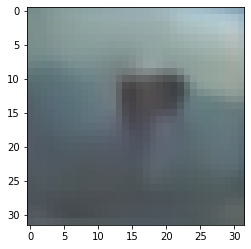

epoch: 26, step: 0, loss: 0.058465924113988876
epoch: 26, step: 200, loss: 0.054874129593372345


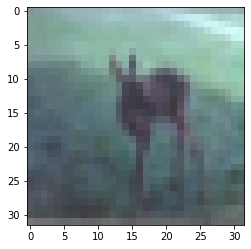

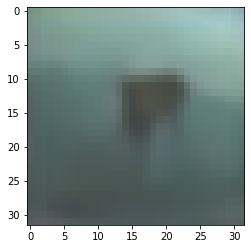

epoch: 27, step: 0, loss: 0.05514896661043167
epoch: 27, step: 200, loss: 0.05662316083908081


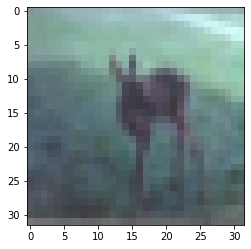

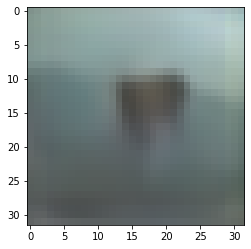

epoch: 28, step: 0, loss: 0.05866348743438721
epoch: 28, step: 200, loss: 0.05461443215608597


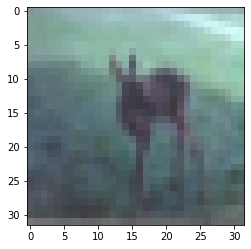

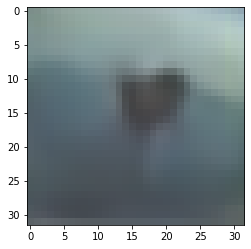

epoch: 29, step: 0, loss: 0.05614537000656128
epoch: 29, step: 200, loss: 0.05581957846879959


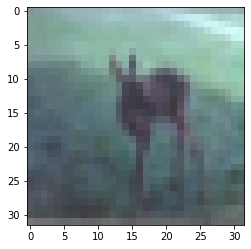

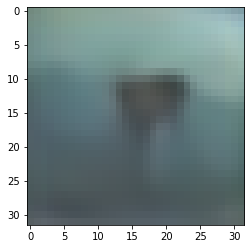

In [22]:
for epoch in range(n_epochs):
    model4.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model4(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model4.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model4.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

**Вывод:** увеличение числа эпох не дает какого-либо заметного улучшения. После 13-й эпохи loss перестает падать.
Пробую сжимать картинку не так сильно, применив только один MaxPooling. Количество эпох определим 13

In [ ]:
class ConvEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                               padding=2)
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 8x8

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)

        self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1,
                               padding=1)  # 16x16

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.conv4(x)

        return x


class ConvDecoder4(nn.Module):

    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 32x32

        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*2, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x


class ConvAutoEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvEncoder4(input_ch, hidden_ch, )
        self.decoder = ConvDecoder4(input_ch, hidden_ch, )

    def forward(self, x):
        hidden = self.encoder(x)
        x_ = self.decoder(hidden)

        return x_


In [26]:
hidden_ch = 100
n_epochs = 13
model4 = ConvAutoEncoder4(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model4.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5541133880615234
epoch: 0, step: 200, loss: 0.06536959111690521


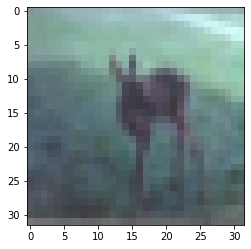

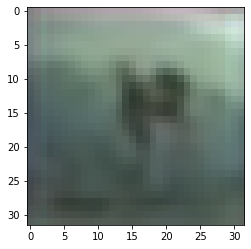

epoch: 1, step: 0, loss: 0.051616452634334564
epoch: 1, step: 200, loss: 0.04933668673038483


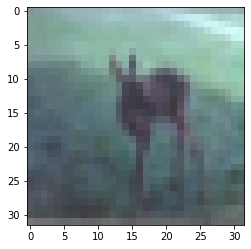

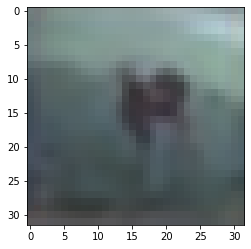

epoch: 2, step: 0, loss: 0.047411929816007614
epoch: 2, step: 200, loss: 0.04317014664411545


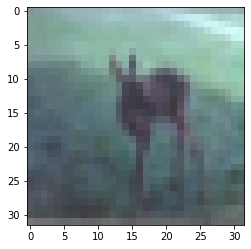

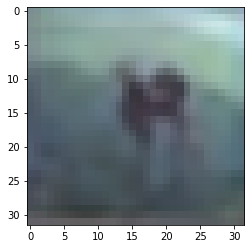

epoch: 3, step: 0, loss: 0.04402932524681091
epoch: 3, step: 200, loss: 0.04407737776637077


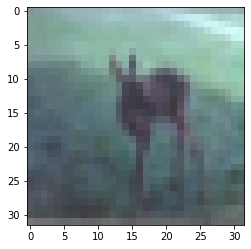

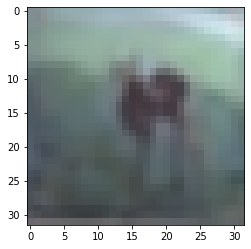

epoch: 4, step: 0, loss: 0.03731384500861168
epoch: 4, step: 200, loss: 0.036345988512039185


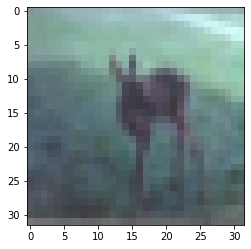

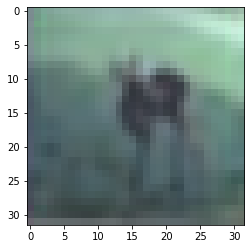

epoch: 5, step: 0, loss: 0.0383281372487545
epoch: 5, step: 200, loss: 0.036263175308704376


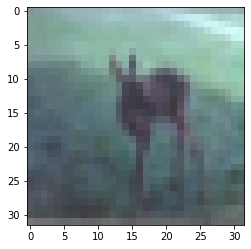

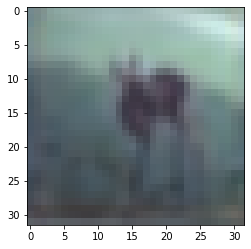

epoch: 6, step: 0, loss: 0.038370344787836075
epoch: 6, step: 200, loss: 0.030977359041571617


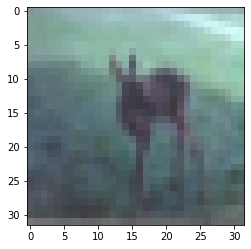

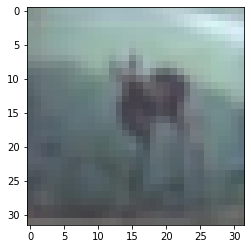

epoch: 7, step: 0, loss: 0.031984277069568634
epoch: 7, step: 200, loss: 0.03476817533373833


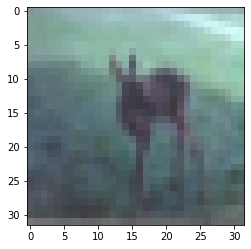

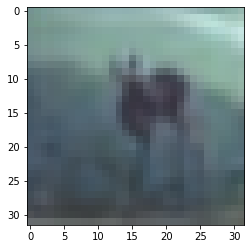

epoch: 8, step: 0, loss: 0.03423939272761345
epoch: 8, step: 200, loss: 0.03198251500725746


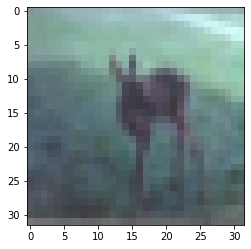

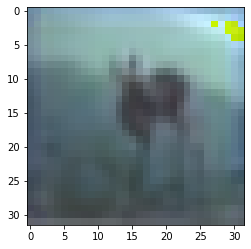

epoch: 9, step: 0, loss: 0.03582741320133209
epoch: 9, step: 200, loss: 0.03261132165789604


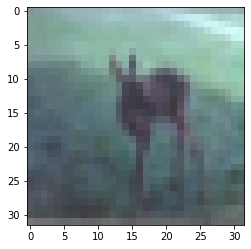

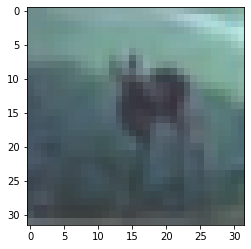

epoch: 10, step: 0, loss: 0.03204378858208656
epoch: 10, step: 200, loss: 0.029212795197963715


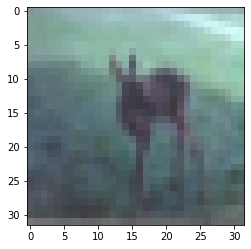

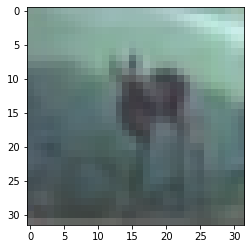

epoch: 11, step: 0, loss: 0.031919173896312714
epoch: 11, step: 200, loss: 0.03468277305364609


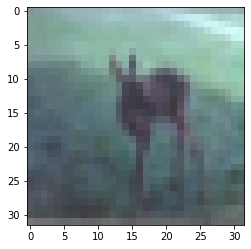

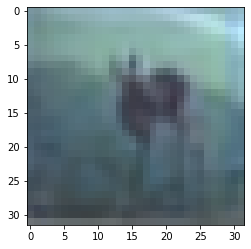

epoch: 12, step: 0, loss: 0.03457071632146835
epoch: 12, step: 200, loss: 0.032456085085868835


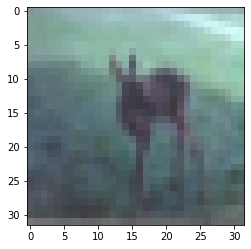

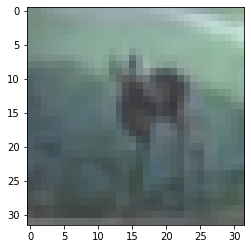

In [ ]:
for epoch in range(n_epochs):
    model4.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model4(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model4.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model4.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

**Вывод:** результат получился отличным. Модель с 2-ым сжатием справляется хорошо. Учитывая, что сжимается сигнал с 3-х каналов, а не с одного, как с ч/б картинкой, сжатие в 2 раза столь маленькой картинки считаю достойным результатом. Визуально приемлемый результат уже можно получить на 10-й эпохе

Примеры других картинок из датасета

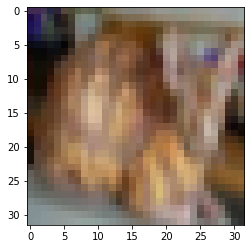

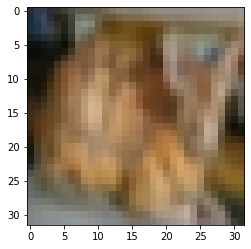

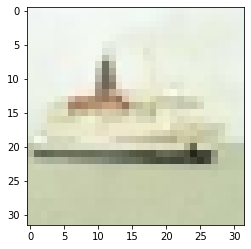

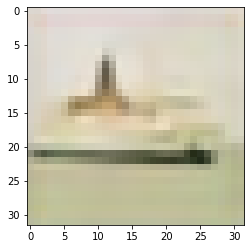

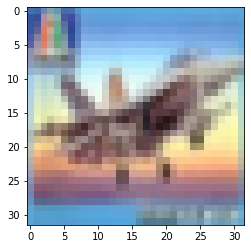

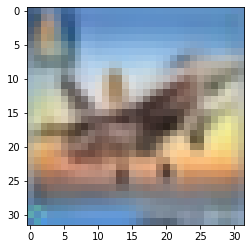

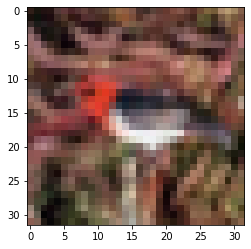

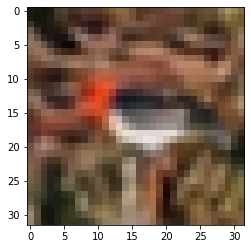

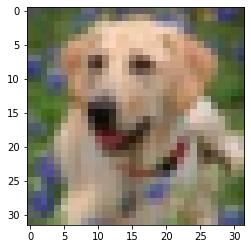

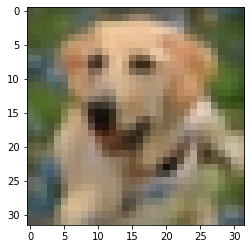

In [ ]:
with torch.no_grad():
    model4.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

*Для сравнения попробуем MSELoss на этой же архитектуре. 10 эпох*

In [ ]:
class ConvEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                               padding=2)
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 8x8

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        #self.norm = nn.BatchNorm2d(hidden_ch)

        self.conv4 = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1,
                               padding=1)  # 16x16

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.conv4(x)

        return x


class ConvDecoder4(nn.Module):

    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 32x32

        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*2, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x


class ConvAutoEncoder4(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvEncoder4(input_ch, hidden_ch, )
        self.decoder = ConvDecoder4(input_ch, hidden_ch, )

    def forward(self, x):
        hidden = self.encoder(x)
        x_ = self.decoder(hidden)

        return x_


In [27]:
hidden_ch = 100
n_epochs = 10
model4 = ConvAutoEncoder4(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model4.parameters())
#loss_func = nn.L1Loss()
loss_func = nn.MSELoss()

epoch: 0, step: 0, loss: 0.4761224389076233
epoch: 0, step: 200, loss: 0.015266608446836472


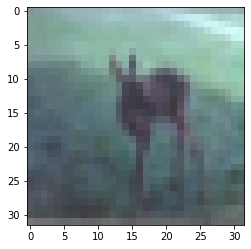

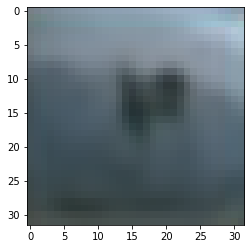

epoch: 1, step: 0, loss: 0.006845991127192974
epoch: 1, step: 200, loss: 0.006068117450922728


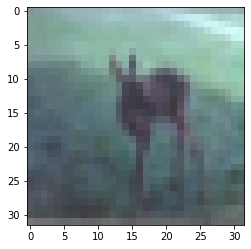

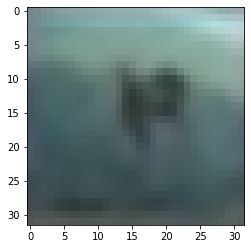

epoch: 2, step: 0, loss: 0.004514523781836033
epoch: 2, step: 200, loss: 0.003632873296737671


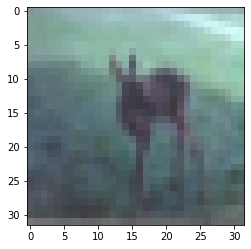

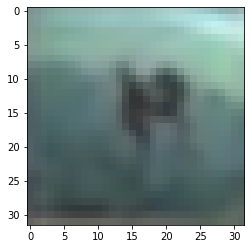

epoch: 3, step: 0, loss: 0.004142876714468002
epoch: 3, step: 200, loss: 0.0038784202188253403


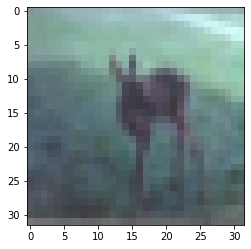

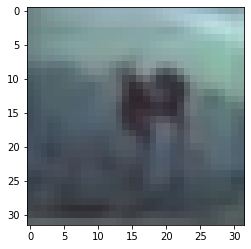

epoch: 4, step: 0, loss: 0.003486885456368327
epoch: 4, step: 200, loss: 0.0036296143662184477


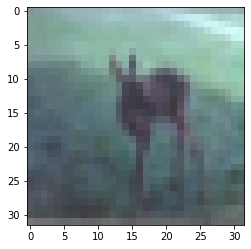

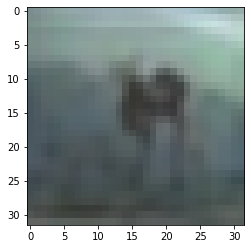

epoch: 5, step: 0, loss: 0.0027046999894082546
epoch: 5, step: 200, loss: 0.0035984423011541367


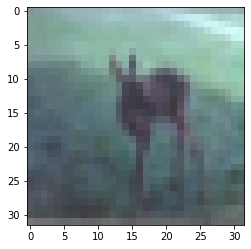

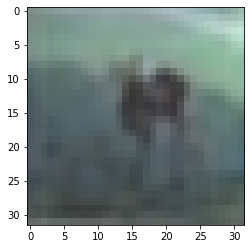

epoch: 6, step: 0, loss: 0.002615697681903839
epoch: 6, step: 200, loss: 0.0025458536110818386


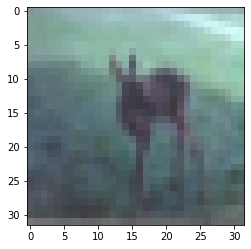

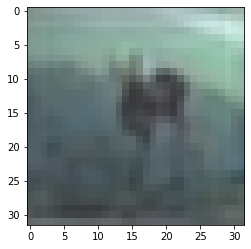

epoch: 7, step: 0, loss: 0.0022300088312476873
epoch: 7, step: 200, loss: 0.0026125411968678236


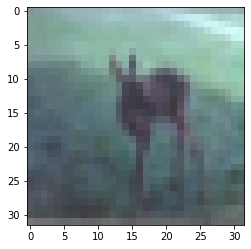

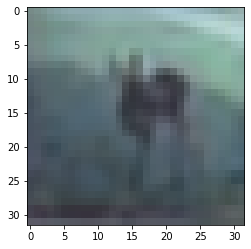

epoch: 8, step: 0, loss: 0.0021238718181848526
epoch: 8, step: 200, loss: 0.0031559362541884184


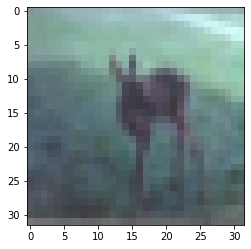

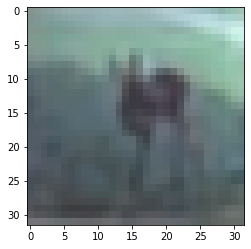

epoch: 9, step: 0, loss: 0.002235890133306384
epoch: 9, step: 200, loss: 0.002092205686494708


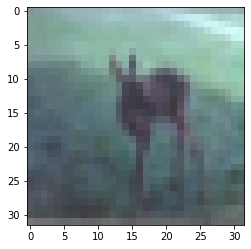

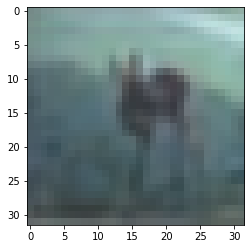

In [ ]:
for epoch in range(n_epochs):
    model4.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict = model4(inputs.to(device))
        loss = loss_func(inputs.to(device), predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model4.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model4.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

**Вывод:** Использование L1Loss показывает лучший результат

Примеры картинок с MSE

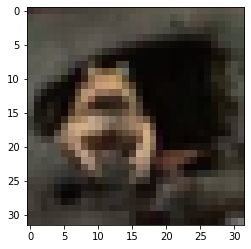

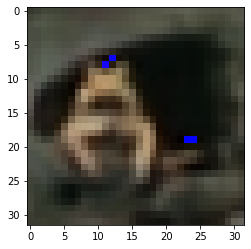

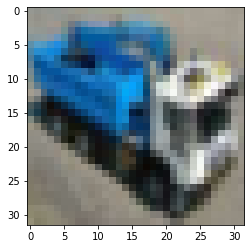

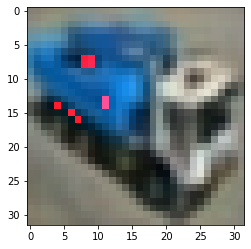

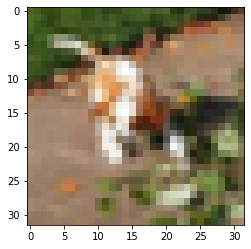

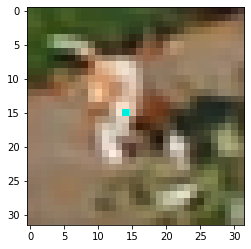

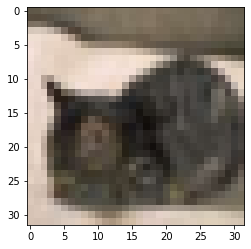

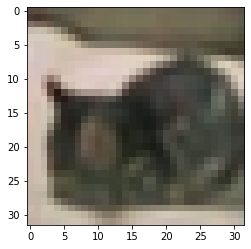

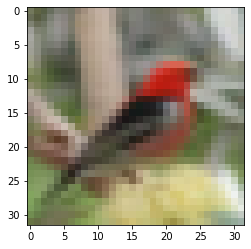

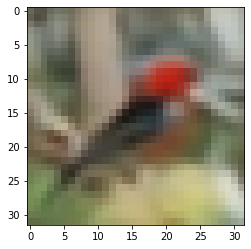

In [ ]:
with torch.no_grad():
    model4.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model4(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

# Уменьшение шума

In [ ]:
model_denoise = ConvAutoEncoder4(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model_denoise.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.5571603775024414
epoch: 0, step: 200, loss: 0.07475350797176361


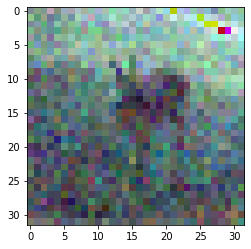

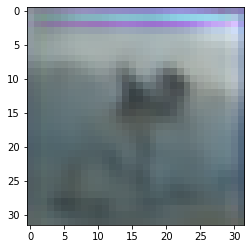

epoch: 1, step: 0, loss: 0.061756886541843414
epoch: 1, step: 200, loss: 0.0515655092895031


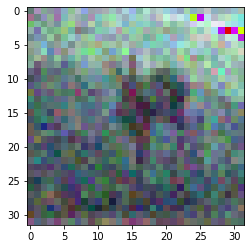

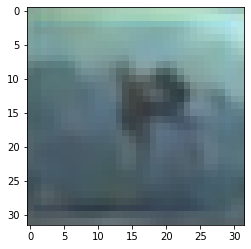

epoch: 2, step: 0, loss: 0.04951302707195282
epoch: 2, step: 200, loss: 0.04513783007860184


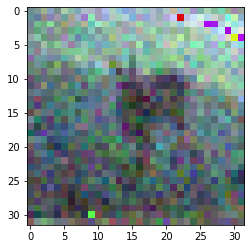

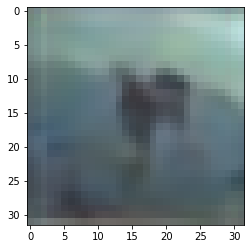

epoch: 3, step: 0, loss: 0.04471465200185776
epoch: 3, step: 200, loss: 0.042498629540205


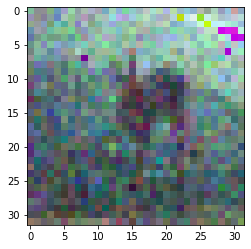

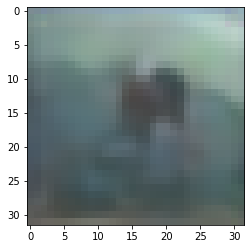

epoch: 4, step: 0, loss: 0.04166784882545471
epoch: 4, step: 200, loss: 0.04570316523313522


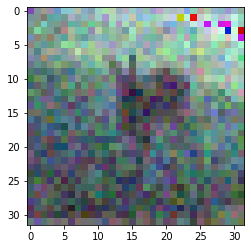

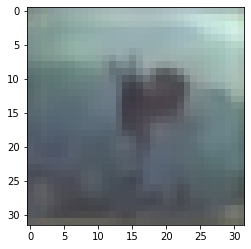

epoch: 5, step: 0, loss: 0.04259144514799118
epoch: 5, step: 200, loss: 0.04028996452689171


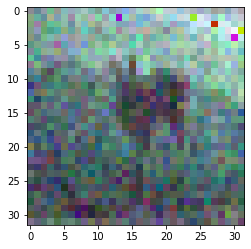

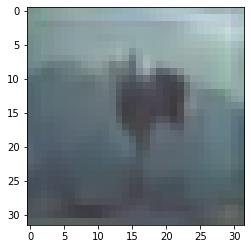

epoch: 6, step: 0, loss: 0.03891019523143768
epoch: 6, step: 200, loss: 0.03954457491636276


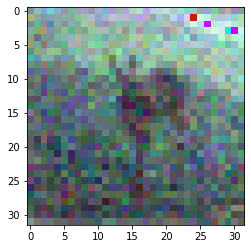

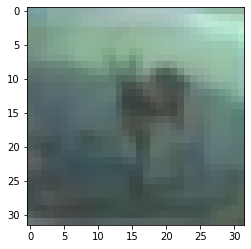

epoch: 7, step: 0, loss: 0.039465922862291336
epoch: 7, step: 200, loss: 0.04023943841457367


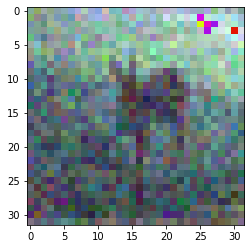

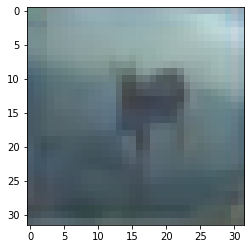

epoch: 8, step: 0, loss: 0.04096272215247154
epoch: 8, step: 200, loss: 0.038232602179050446


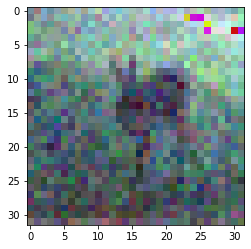

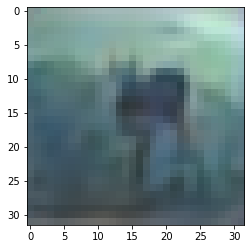

epoch: 9, step: 0, loss: 0.03712013363838196
epoch: 9, step: 200, loss: 0.0406189039349556


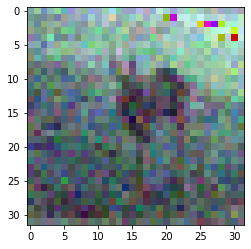

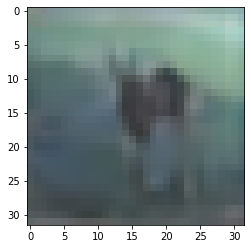

In [ ]:
for epoch in range(n_epochs):
    model_denoise.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        inputs = inputs.to(device)
        noise_inputs = inputs + \
        torch.normal(torch.zeros_like(inputs), torch.ones_like(inputs)) * 0.08 
        predict = model_denoise(noise_inputs)
        loss = loss_func(inputs, predict)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_denoise.state_dict(), f'./lin_ae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model_denoise.train(False)
        item = dataset_test[555][0].to(device).float()
        item = item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.08
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model_denoise(item.unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()

Картинка на входе:


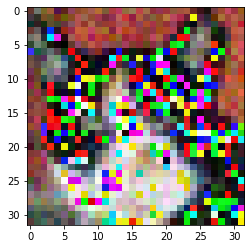

Картинка после обработки на модели:


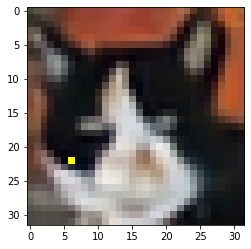

Исходная картинка:


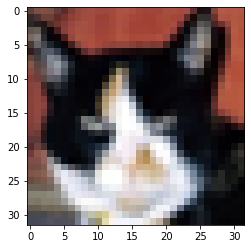

Картинка на входе:


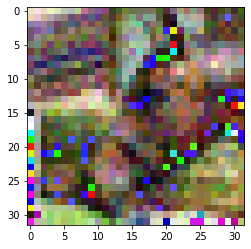

Картинка после обработки на модели:


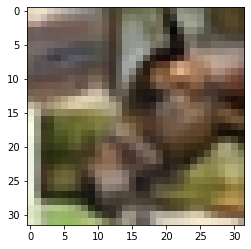

Исходная картинка:


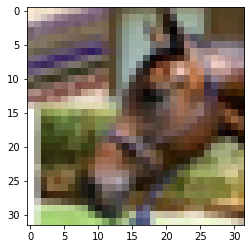

Картинка на входе:


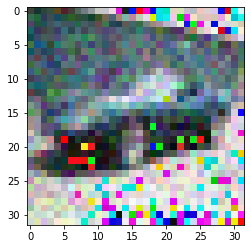

Картинка после обработки на модели:


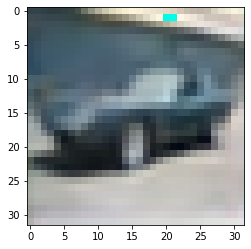

Исходная картинка:


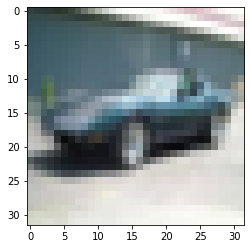

Картинка на входе:


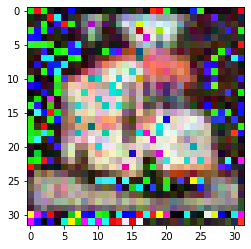

Картинка после обработки на модели:


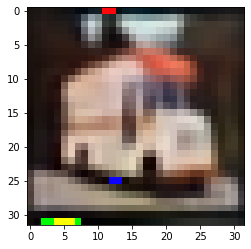

Исходная картинка:


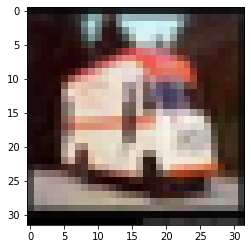

Картинка на входе:


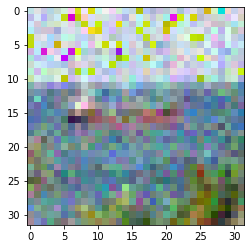

Картинка после обработки на модели:


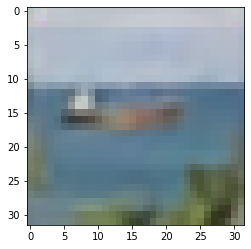

Исходная картинка:


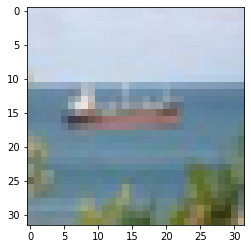

In [ ]:
with torch.no_grad():
    model_denoise.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        print('Картинка на входе:')
        plt.imshow(transforms.ToPILImage()(item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.08))
        plt.show()
        print('Картинка после обработки на модели:')
        plt.imshow(transforms.ToPILImage()(model_denoise((item + torch.normal(torch.zeros_like(item), torch.ones_like(item)) * 0.08).unsqueeze(0)).squeeze().cpu().detach()))
        plt.show()
        print('Исходная картинка:')
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()

**Вывод:** модель справляется с задачей достойно

# VAE

Пробуем сжатие в 4-раза, ф-я потерь L1Loss, т.к. показала себя лучше

In [ ]:
class ConvVAEncoder(nn.Module):
    def __init__(self, input_ch, hidden_ch):
      super().__init__()
      self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                              padding=2)
      self.activ = nn.ReLU()
      self.do1 = nn.Dropout(0.1)
      self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

      self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                              padding=1)  # 16x16
      self.activ2 = nn.ReLU()
      self.do2 = nn.Dropout(0.1)
      self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 8x8

      self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                      padding=1)
      self.activ3 = nn.ReLU()
      self.do3 = nn.Dropout(0.1)

      self.norm = nn.BatchNorm2d(hidden_ch)

      self.conv4_mu = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 8x8
      self.conv4_sigma = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 8x8

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        mu = self.conv4_mu(x)
        sigma = torch.exp(self.conv4_sigma(x))

        return mu, sigma



class ConvDecoder(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 8x8
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 16x16

        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*2, kernel_size=3, stride=1,
                                        padding=1)  # 16x16
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x

def sampling(mu, sigma):
    return torch.normal(torch.zeros_like(mu), torch.ones_like(mu)) * sigma + mu

class ConvVAE(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvVAEncoder(input_ch, hidden_ch, )
        self.decoder = ConvDecoder(input_ch, hidden_ch, )

    def forward(self, x):
        mu, sigma = self.encoder(x)
        hidden = sampling(mu, sigma)
        x_ = self.decoder(hidden)


        return x_, mu, sigma

In [ ]:
def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(mu))
    return torch.distributions.kl_divergence(p, q).mean()

model_VAE = ConvVAE(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model_VAE.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.617397665977478
epoch: 0, step: 200, loss: 0.1452106535434723


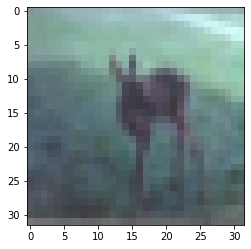

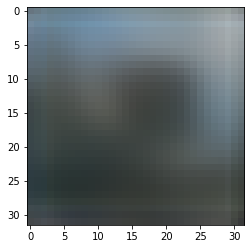

epoch: 1, step: 0, loss: 0.10597434639930725
epoch: 1, step: 200, loss: 0.09310980141162872


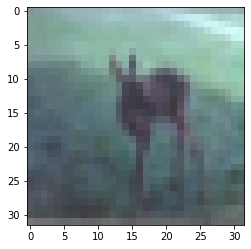

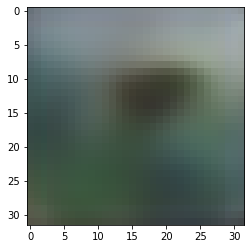

epoch: 2, step: 0, loss: 0.08721877634525299
epoch: 2, step: 200, loss: 0.08616337925195694


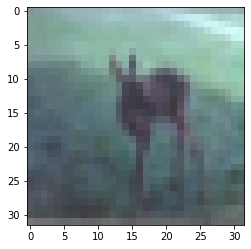

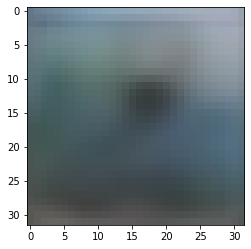

epoch: 3, step: 0, loss: 0.08300760388374329
epoch: 3, step: 200, loss: 0.08146195858716965


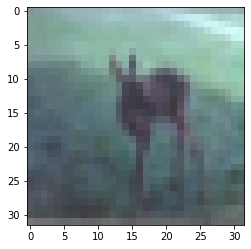

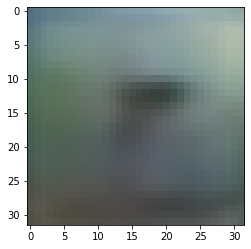

epoch: 4, step: 0, loss: 0.08253130316734314
epoch: 4, step: 200, loss: 0.08478745818138123


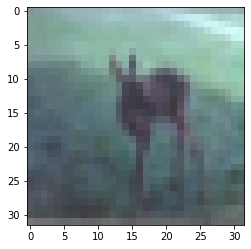

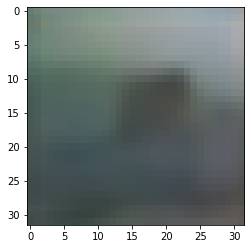

epoch: 5, step: 0, loss: 0.07723389565944672
epoch: 5, step: 200, loss: 0.08196420967578888


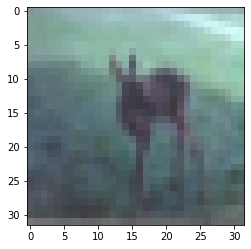

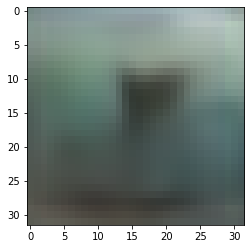

epoch: 6, step: 0, loss: 0.07869594544172287
epoch: 6, step: 200, loss: 0.07846180349588394


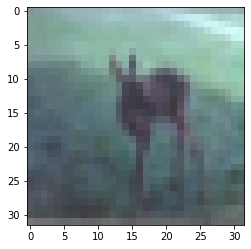

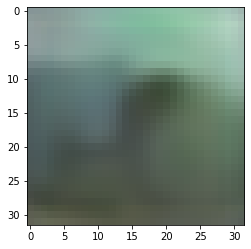

epoch: 7, step: 0, loss: 0.08015862852334976
epoch: 7, step: 200, loss: 0.07906986773014069


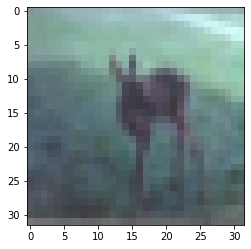

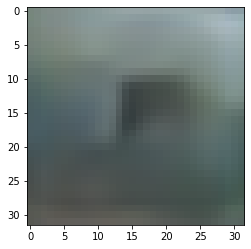

epoch: 8, step: 0, loss: 0.0768948495388031
epoch: 8, step: 200, loss: 0.07686034590005875


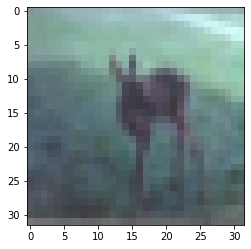

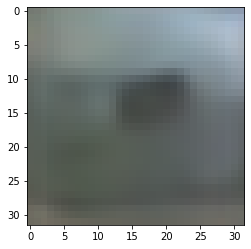

epoch: 9, step: 0, loss: 0.0773058831691742
epoch: 9, step: 200, loss: 0.07279875129461288


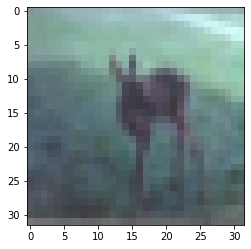

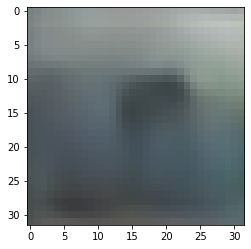

In [ ]:
for epoch in range(n_epochs):
    model_VAE.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict, mu, sigma = model_VAE(inputs.to(device))
        loss = loss_func(inputs.to(device), predict) + 0.01 * kl_loss(mu, sigma)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_VAE.state_dict(), f'./Vae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model_VAE.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model_VAE(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()

Исходная картинка:


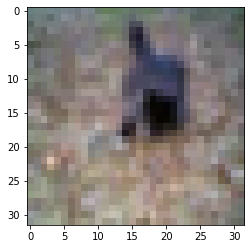

Картинка после обработки на модели:


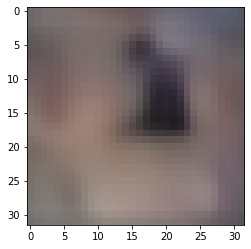

Исходная картинка:


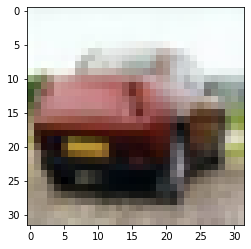

Картинка после обработки на модели:


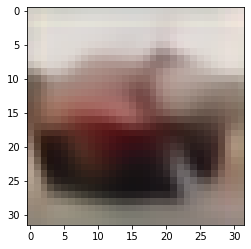

Исходная картинка:


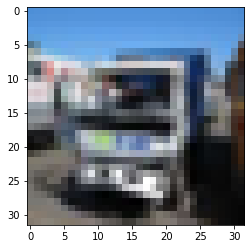

Картинка после обработки на модели:


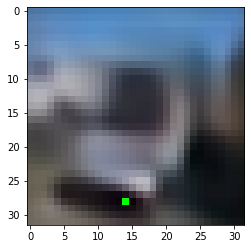

Исходная картинка:


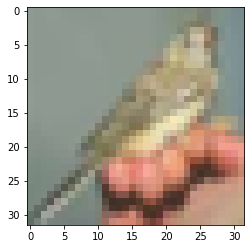

Картинка после обработки на модели:


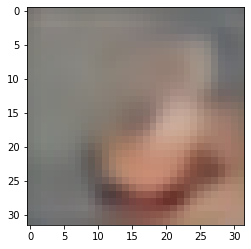

Исходная картинка:


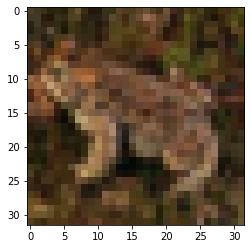

Картинка после обработки на модели:


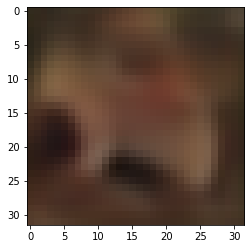

In [ ]:
with torch.no_grad():
    model_VAE.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        print('Исходная картинка:')
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        print('Картинка после обработки на модели:')
        plt.imshow(transforms.ToPILImage()(model_VAE(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()
        

По итогу получили неудовлетворительный результат. Попробуем меньше сжимать изображение

In [28]:
class ConvVAEncoder2(nn.Module):
    def __init__(self, input_ch, hidden_ch):
      super().__init__()
      self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                              padding=2)
      self.activ = nn.ReLU()
      self.do1 = nn.Dropout(0.1)
      #self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

      self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                              padding=1)  # 32x32
      self.activ2 = nn.ReLU()
      self.do2 = nn.Dropout(0.1)
      self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 16x16

      self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                      padding=1)
      self.activ3 = nn.ReLU()
      self.do3 = nn.Dropout(0.1)

      self.norm = nn.BatchNorm2d(hidden_ch)

      self.conv4_mu = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 16x16
      self.conv4_sigma = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 16x16

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        #x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        mu = self.conv4_mu(x)
        sigma = torch.exp(self.conv4_sigma(x))

        return mu, sigma



class ConvVADecoder2(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 32x32

        self.conv2 = nn.Conv2d(hidden_ch, hidden_ch*2, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                               padding=1)
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.norm = nn.BatchNorm2d(hidden_ch)
        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.upsample2(x)

        x = self.conv3(x)
        x = self.activ3(x)
        x = self.do3(x)
        x = self.norm(x)

        x = self.conv4(x)

        return x

def sampling(mu, sigma):
    return torch.normal(torch.zeros_like(mu), torch.ones_like(mu)) * sigma + mu

class ConvVAE2(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvVAEncoder2(input_ch, hidden_ch, )
        self.decoder = ConvVADecoder2(input_ch, hidden_ch, )

    def forward(self, x):
        mu, sigma = self.encoder(x)
        hidden = sampling(mu, sigma)
        x_ = self.decoder(hidden)


        return x_, mu, sigma

In [29]:
def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(mu))
    return torch.distributions.kl_divergence(p, q).mean()

model_VAE2 = ConvVAE2(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model_VAE2.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.6293825507164001
epoch: 0, step: 200, loss: 0.09102796763181686


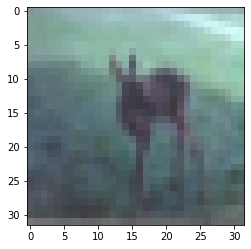

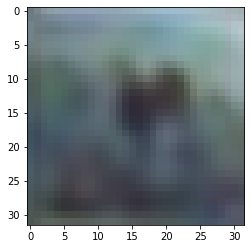

epoch: 1, step: 0, loss: 0.07435893267393112
epoch: 1, step: 200, loss: 0.07149240374565125


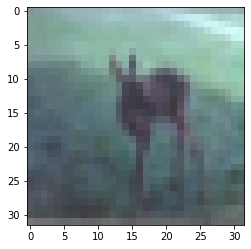

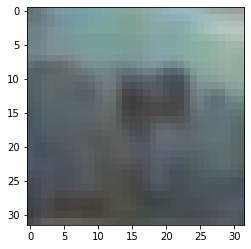

epoch: 2, step: 0, loss: 0.06451494246721268
epoch: 2, step: 200, loss: 0.06676360219717026


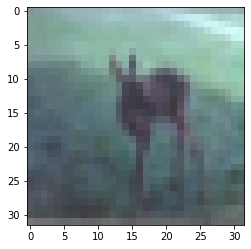

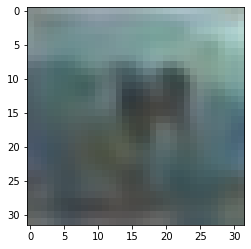

epoch: 3, step: 0, loss: 0.0660947859287262
epoch: 3, step: 200, loss: 0.06429026275873184


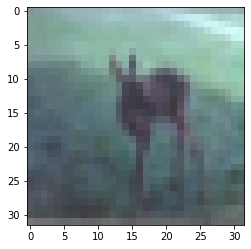

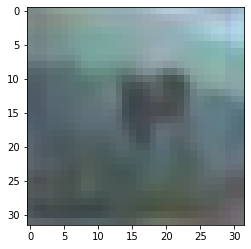

epoch: 4, step: 0, loss: 0.062029384076595306
epoch: 4, step: 200, loss: 0.060971781611442566


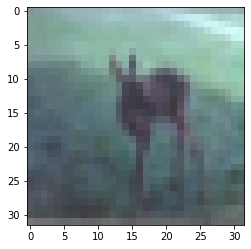

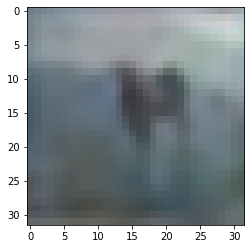

epoch: 5, step: 0, loss: 0.061967361718416214
epoch: 5, step: 200, loss: 0.06500802934169769


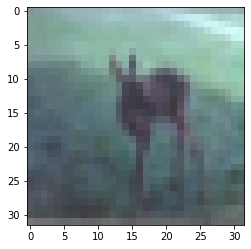

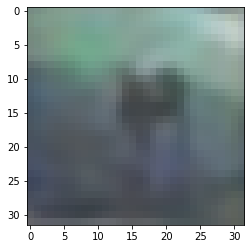

epoch: 6, step: 0, loss: 0.06444597244262695
epoch: 6, step: 200, loss: 0.05665275454521179


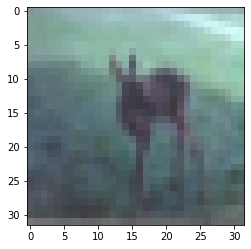

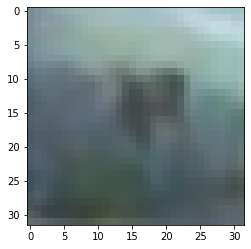

epoch: 7, step: 0, loss: 0.058940380811691284
epoch: 7, step: 200, loss: 0.060174837708473206


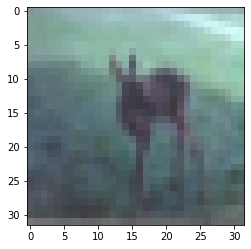

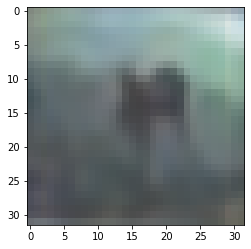

epoch: 8, step: 0, loss: 0.059315089136362076
epoch: 8, step: 200, loss: 0.06186295673251152


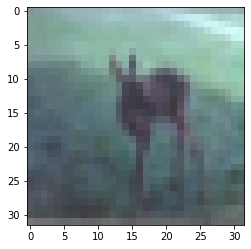

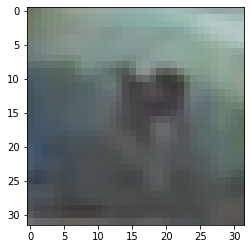

epoch: 9, step: 0, loss: 0.05606452748179436
epoch: 9, step: 200, loss: 0.056535739451646805


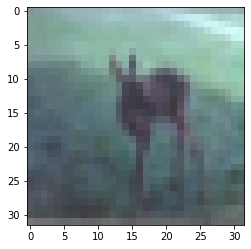

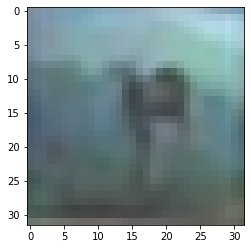

In [30]:
for epoch in range(n_epochs):
    model_VAE2.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict, mu, sigma = model_VAE2(inputs.to(device))
        loss = loss_func(inputs.to(device), predict) + 0.01 * kl_loss(mu, sigma)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_VAE2.state_dict(), f'./Vae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model_VAE2.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model_VAE2(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()

Исходная картинка:


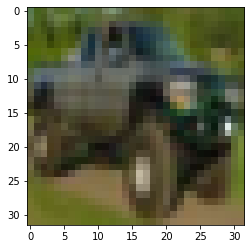

Картинка после обработки на модели:


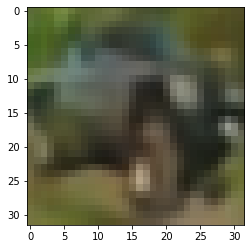

Исходная картинка:


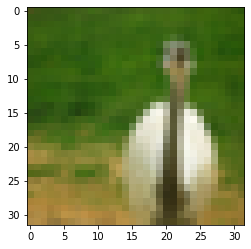

Картинка после обработки на модели:


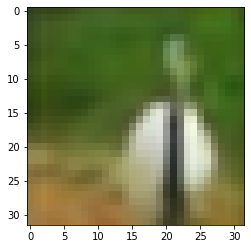

Исходная картинка:


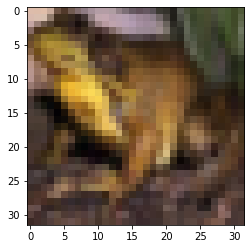

Картинка после обработки на модели:


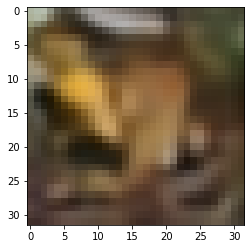

Исходная картинка:


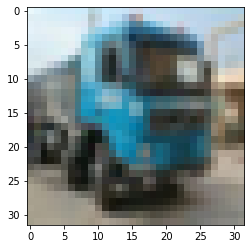

Картинка после обработки на модели:


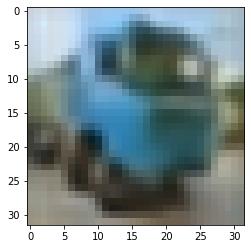

Исходная картинка:


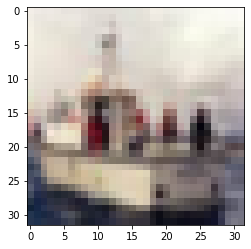

Картинка после обработки на модели:


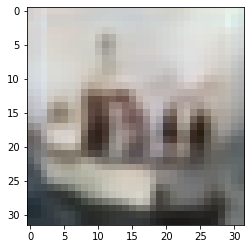

In [31]:
with torch.no_grad():
    model_VAE2.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        print('Исходная картинка:')
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        print('Картинка после обработки на модели:')
        plt.imshow(transforms.ToPILImage()(model_VAE2(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()
        

Модель отработала очень плохо. С 5-й эпохи обучение начало выдавать огромню ошибку. Попробуем немного изменить архитектуру.

In [32]:
class ConvVAEncoder2(nn.Module):
    def __init__(self, input_ch, hidden_ch):
      super().__init__()
      self.conv1 = nn.Conv2d(input_ch, hidden_ch*2, kernel_size=5, stride=1,
                              padding=2)
      self.activ = nn.ReLU()
      self.do1 = nn.Dropout(0.1)
      #self.pool1 = nn.MaxPool2d(2, 2)  # 16x16

      self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                              padding=1)  # 32x32
      self.activ2 = nn.ReLU()
      self.do2 = nn.Dropout(0.1)
      self.pool2 = nn.FractionalMaxPool2d(3, output_ratio=(0.5, 0.5))  # 16x16

      self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                      padding=1)
      self.activ3 = nn.ReLU()
      self.do3 = nn.Dropout(0.1)

      self.norm = nn.BatchNorm2d(hidden_ch)

      self.conv4_mu = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 16x16
      self.conv4_sigma = nn.Conv2d(hidden_ch, 3, kernel_size=3, stride=1, 
                            padding=1) # 16x16

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        #x = self.pool1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.norm(x)
        x = self.activ3(x)
        x = self.do3(x)
        

        mu = self.conv4_mu(x)
        sigma = torch.exp(self.conv4_sigma(x))

        return mu, sigma



class ConvVADecoder2(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        #TODO try to use other layers
        self.conv1 = nn.Conv2d(3, hidden_ch*2, kernel_size=3, stride=1,
                               padding=1)  # 16x16
        self.activ = nn.ReLU()
        self.do1 = nn.Dropout(0.1)
        self.upsample1 = nn.UpsamplingBilinear2d(scale_factor=2)  # 32x32

        self.conv2 = nn.Conv2d(hidden_ch*2, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ2 = nn.ReLU()
        self.do2 = nn.Dropout(0.1)
        #self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)  # 32x32

        self.conv3 = nn.Conv2d(hidden_ch, hidden_ch, kernel_size=3, stride=1,
                                        padding=1)  # 32x32
        self.activ3 = nn.ReLU()
        self.do3 = nn.Dropout(0.1)

        self.conv4 = nn.Conv2d(hidden_ch, input_ch, kernel_size=5, stride=1,
                               padding=2)  # 32x32

        self.norm = nn.BatchNorm2d(hidden_ch)

    def forward(self, x):
        x = self.conv1(x)
        x = self.activ(x)
        x = self.do1(x)
        x = self.upsample1(x)

        x = self.conv2(x)
        x = self.activ2(x)
        x = self.do2(x)
        #x = self.upsample2(x)

        x = self.conv3(x)
        x = self.norm(x)
        x = self.activ3(x)
        x = self.do3(x)

        x = self.conv4(x)

        return x

def sampling(mu, sigma):
    return torch.normal(torch.zeros_like(mu), torch.ones_like(mu)) * sigma + mu

class ConvVAE2(nn.Module):
    def __init__(self, input_ch, hidden_ch, ):
        super().__init__()
        self.encoder = ConvVAEncoder2(input_ch, hidden_ch, )
        self.decoder = ConvVADecoder2(input_ch, hidden_ch, )

    def forward(self, x):
        mu, sigma = self.encoder(x)
        hidden = sampling(mu, sigma)
        x_ = self.decoder(hidden)


        return x_, mu, sigma

In [33]:
def kl_loss(mu, sigma):
    p = torch.distributions.Normal(mu, sigma)
    q = torch.distributions.Normal(torch.zeros_like(mu), torch.ones_like(mu))
    return torch.distributions.kl_divergence(p, q).mean()

model_VAE2 = ConvVAE2(input_channels, hidden_channels).to(device)
optim = torch.optim.Adam(model_VAE2.parameters())
loss_func = nn.L1Loss()

epoch: 0, step: 0, loss: 0.672197163105011
epoch: 0, step: 200, loss: 0.10588913410902023


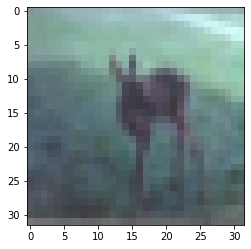

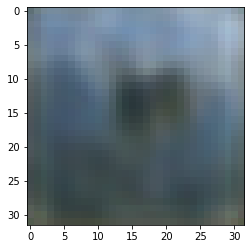

epoch: 1, step: 0, loss: 0.08845405280590057
epoch: 1, step: 200, loss: 0.08941551297903061


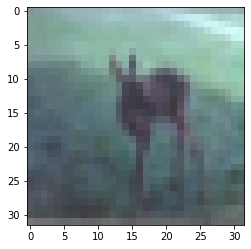

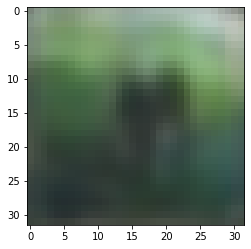

epoch: 2, step: 0, loss: 0.07648595422506332
epoch: 2, step: 200, loss: 0.08030973374843597


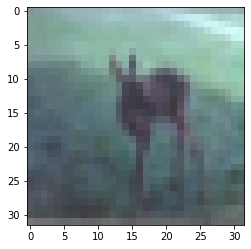

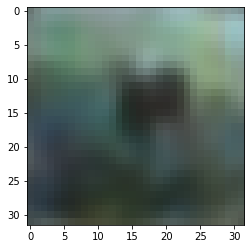

epoch: 3, step: 0, loss: 0.07248499244451523
epoch: 3, step: 200, loss: 0.06815163791179657


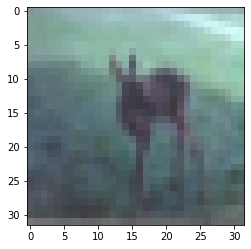

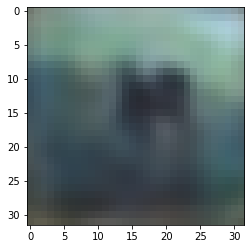

epoch: 4, step: 0, loss: 0.06838749349117279
epoch: 4, step: 200, loss: 0.06410463899374008


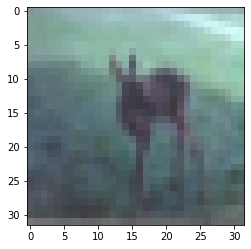

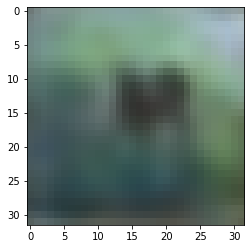

epoch: 5, step: 0, loss: 0.06726589798927307
epoch: 5, step: 200, loss: 0.061441272497177124


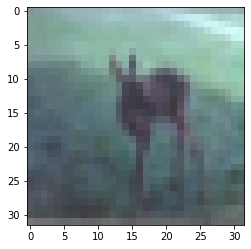

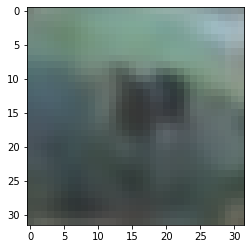

epoch: 6, step: 0, loss: 0.06493860483169556
epoch: 6, step: 200, loss: 0.06254377216100693


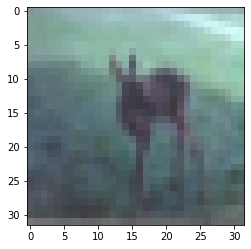

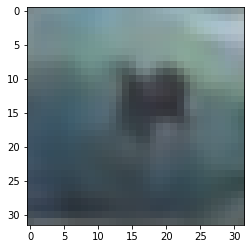

epoch: 7, step: 0, loss: 0.06307915598154068
epoch: 7, step: 200, loss: 0.0650608018040657


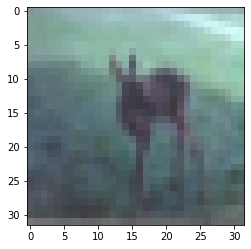

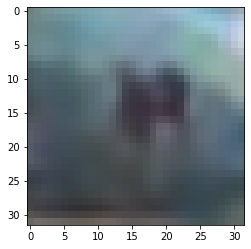

epoch: 8, step: 0, loss: 0.06353060901165009
epoch: 8, step: 200, loss: 0.06592696905136108


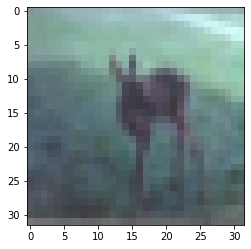

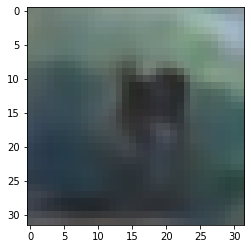

epoch: 9, step: 0, loss: 0.06409977376461029
epoch: 9, step: 200, loss: 0.06300343573093414


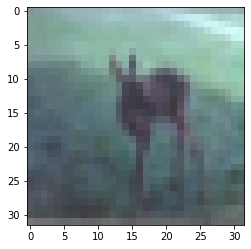

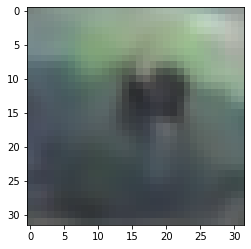

In [34]:
for epoch in range(n_epochs):
    model_VAE2.train()
    for i, batch in enumerate(trainloader):
        inputs, labels = batch
        optim.zero_grad()

        predict, mu, sigma = model_VAE2(inputs.to(device))
        loss = loss_func(inputs.to(device), predict) + 0.01 * kl_loss(mu, sigma)
        loss.backward()
        optim.step()
        if i % 200 == 0:
            print(f'epoch: {epoch}, step: {i}, loss: {loss.item()}')
    torch.save(model_VAE2.state_dict(), f'./Vae_chkpt_{epoch}.pth')
    with torch.no_grad():
        model_VAE2.train(False)
        item = dataset_test[555][0].to(device).float()
        plt.imshow(transforms.ToPILImage()(dataset_test[555][0]))
        plt.show()
        plt.imshow(transforms.ToPILImage()(model_VAE2(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()

Исходная картинка:


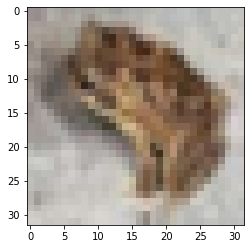

Картинка после обработки на модели:


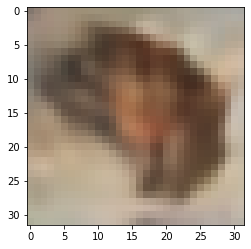

Исходная картинка:


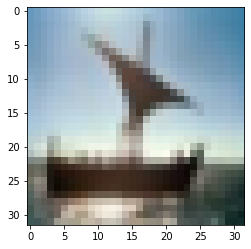

Картинка после обработки на модели:


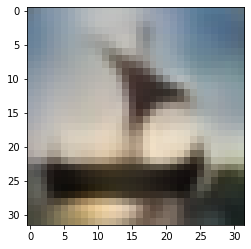

Исходная картинка:


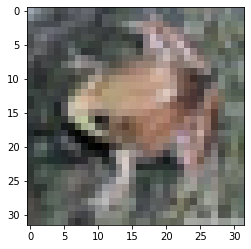

Картинка после обработки на модели:


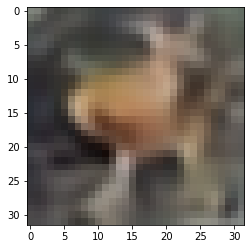

Исходная картинка:


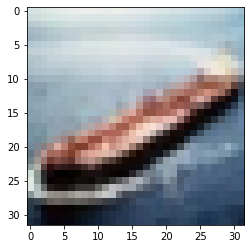

Картинка после обработки на модели:


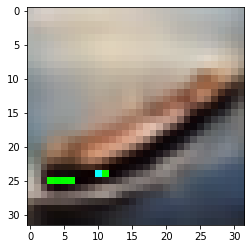

Исходная картинка:


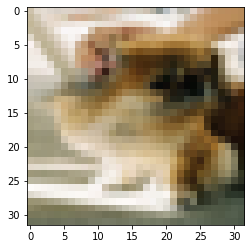

Картинка после обработки на модели:


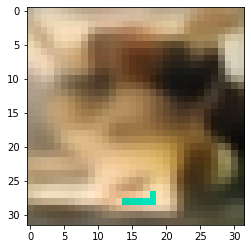

In [35]:
with torch.no_grad():
    model_VAE2.train(False)
    for i in range(5):
        item = dataset_test[int(np.random.choice(10000, 1))][0].to(device).float()
        print('Исходная картинка:')
        plt.imshow(transforms.ToPILImage()(item))
        plt.show()
        print('Картинка после обработки на модели:')
        plt.imshow(transforms.ToPILImage()(model_VAE2(item.unsqueeze(0))[0].squeeze().cpu().detach()))
        plt.show()

**Вывод:** Применение VAE дает очень размытый результат, даже с малым сжатием и малым коэффициентом Кульбака Лейблера. На фото можно увидеть только силуэт, как при применении очень сильного блюр фильтра. Также, некоторые пиксели выводятся с артефактами.